# Analyzing galaxies in the NDWFS Boötes field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
start_time=time()

In [2]:
path = "/home/bruno/Documents/COSMOamautas/Data/"

## Opening file and reading data onto a dataframe

### The following table includes galaxies already selected as having good quality data and not hosting luminous AGN

In [4]:
# Selecting columns to read:
columns = ['RA_1','DEC_1','Z_BEST','z','Mass_median_2','Ks_flux','NUV_rest','R_rest_2','J_rest_2','F_MIPS_24','FErr_MIPS_24_u','FErr_MIPS_24_l','F_PACS_100','F_PACS_160','F_SPIRE_250','F_SPIRE_350','F_SPIRE_500','S_Code']
start_time1 = time()
# Reading the data:
bootes = pd.read_csv(path+'Bootes/bootes_matched_new_radio.csv',usecols=columns)
end_time1 = time()
print(f"Creating dataframe took {end_time1-start_time1:.4g} seconds!")
bootes.info()
print(f"Number of galaxies in catalogue: {len(bootes)}")

Creating dataframe took 53.81 seconds!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838900 entries, 0 to 838899
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RA_1            838900 non-null  float64
 1   DEC_1           838900 non-null  float64
 2   Ks_flux         838900 non-null  float64
 3   F_MIPS_24       771887 non-null  float64
 4   FErr_MIPS_24_u  771887 non-null  float64
 5   FErr_MIPS_24_l  771887 non-null  float64
 6   F_PACS_100      250987 non-null  float64
 7   F_PACS_160      250987 non-null  float64
 8   F_SPIRE_250     261337 non-null  float64
 9   F_SPIRE_350     261337 non-null  float64
 10  F_SPIRE_500     261337 non-null  float64
 11  Z_BEST          838900 non-null  float64
 12  z               838900 non-null  float64
 13  Mass_median_2   834684 non-null  float64
 14  R_rest_2        838663 non-null  float64
 15  J_rest_2        838663 non-null  float64
 16  NUV_rest        8

In [6]:
bootes.count()

RA_1              838900
DEC_1             838900
Ks_flux           838900
F_MIPS_24         771887
FErr_MIPS_24_u    771887
FErr_MIPS_24_l    771887
F_PACS_100        250987
F_PACS_160        250987
F_SPIRE_250       261337
F_SPIRE_350       261337
F_SPIRE_500       261337
Z_BEST            838900
z                 838900
Mass_median_2     834684
R_rest_2          838663
J_rest_2          838663
NUV_rest          838663
S_Code              7900
dtype: int64

## Getting rid of invalid values

Since we will be selecting galaxies based on their rest-frame NUV-R and R-J colors, we shall first discard those entries with invalid values in these fields, such as 'nan' or 'inf', as well as those with negative fluxes in the Ks band. Because we are interested in studying galaxies at high redshift, we will also get rid of the entries with redshift values below 0.1.

In [4]:
pd.options.mode.use_inf_as_na = True
### bootes_Bw = bootes.dropna(subset=['u_flux','R_rest','J_rest'])
bootes.dropna(subset=['NUV_rest','R_rest_2','J_rest_2','z','Z_BEST'],inplace=True)
bootes = bootes[(bootes['Ks_flux']>0) & (bootes['Z_BEST']>0)]# & (bootes['Z_BEST']<=1)]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 682474


In [5]:
print(np.count_nonzero(~np.isfinite(bootes['Mass_median_2'])))
print(np.count_nonzero(~np.isfinite(bootes['Z_BEST'])))

3782
0


 A small number of sources don't have stellar mass estimates available. Here we will also get rid of those.

In [6]:
bootes.dropna(subset=['Mass_median_2'],inplace=True)
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 678692


## Redshift and stellar mass distribution

We can take a look at the distribution of important properties of the galaxies in our sample, such as redshift and stellar mass.

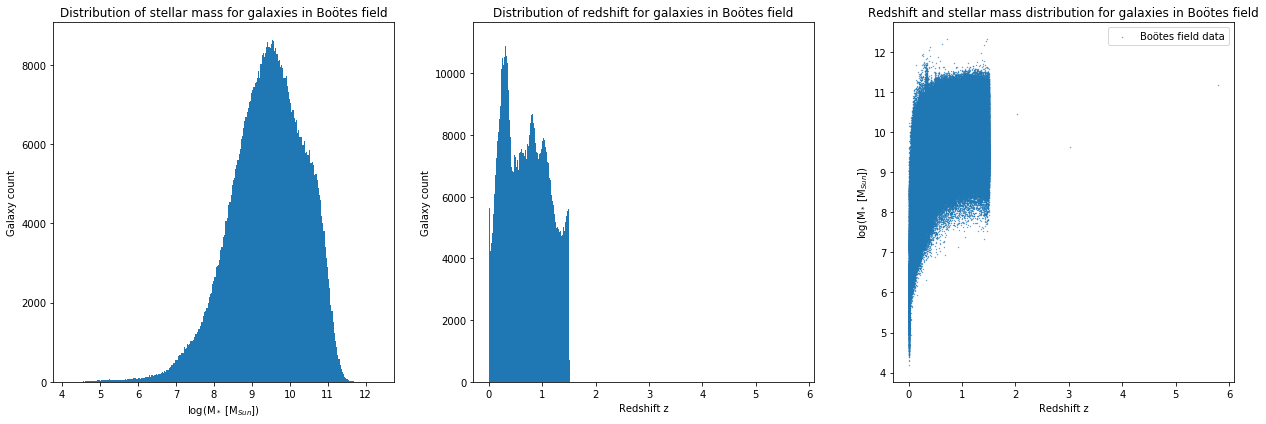

In [8]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{Sun}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median_2'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['Z_BEST'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax[2].scatter(bootes['Z_BEST'],bootes['Mass_median_2'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

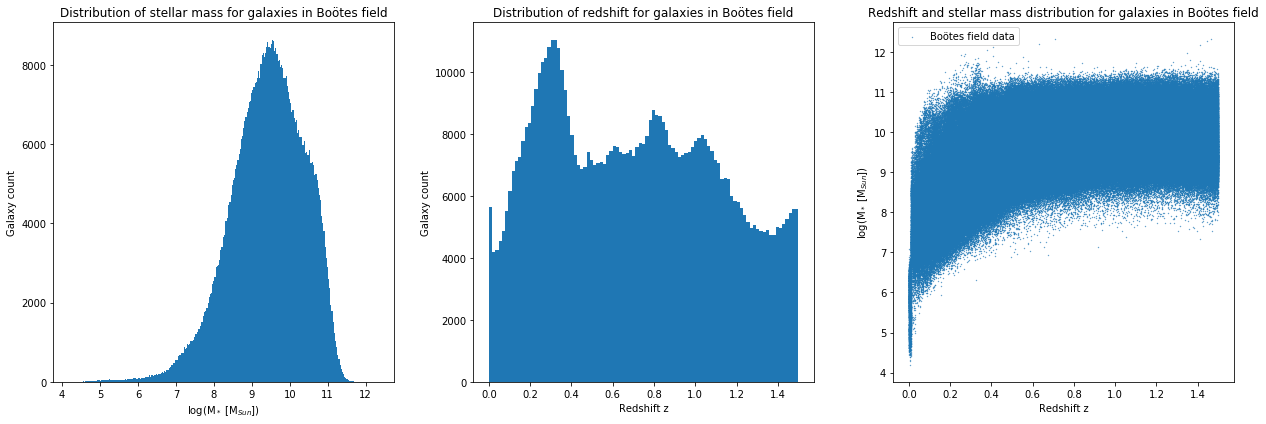

In [9]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{Sun}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median_2'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['z'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax[2].scatter(bootes['z'],bootes['Mass_median_2'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

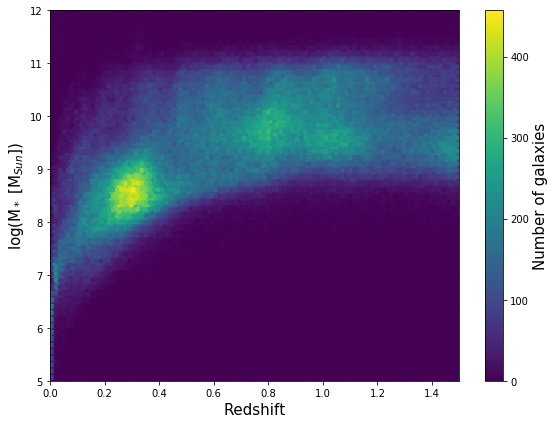

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
#ax.set_title('Redshift and Stellar Mass distribution for sources in Boötes field',fontsize=15)
ax.set_xlabel("Redshift",fontsize=15)
ax.set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
hb = ax.hexbin(bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'z'],
               bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'Mass_median_2'],label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of galaxies',fontsize=15)
ax.set_xlim(xmin=0,xmax=1.5)
ax.set_ylim(ymin=5,ymax=12)
#ax.axhline(24,color='k',linewidth=1)
#ax.legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

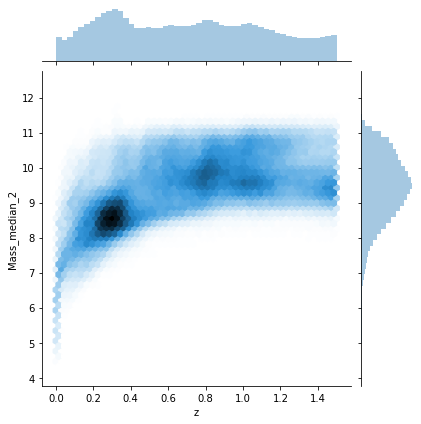

In [12]:
sns.jointplot(x=bootes['z'], y=bootes['Mass_median_2'], kind="hex")#, color="k")

## Ks magnitude distribution

We can also check the distribution of galaxies according to their flux and magnitude in the Ks band. To obtain the magnitudes in the AB system, we shall create a function to perform the appropriate conversion.

In [7]:
def uJyToAB(fluxuJy):
    '''Converts flux in micro Jansky to AB magnitude, with a zeropoint of ~ 3631 Jansky
    Conversion taken from www.star.bristol.ac.uk/~mbt/stilts/sun256/uk.ac.starlink.ttools.func.Fluxes.html'''
    return 23.9-2.5*np.log10(fluxuJy) #2.5*(23+6-np.log10(fluxuJy))-48.6

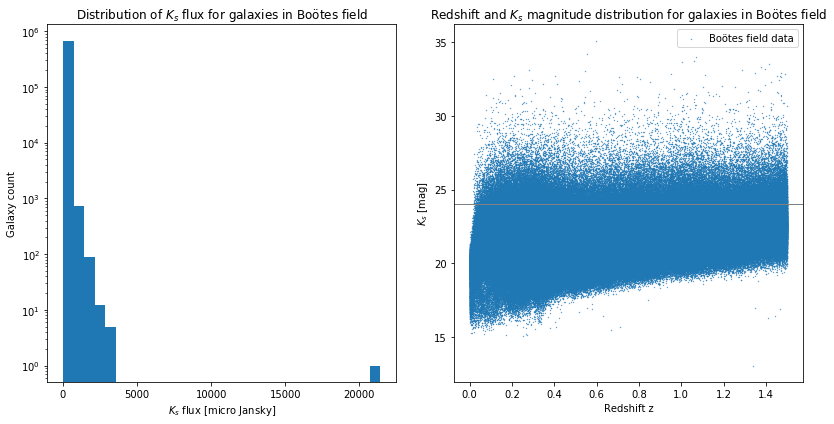

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
# Plotting Ks flux histogram
ax[0].set_title('Distribution of $K_s$ flux for galaxies in Boötes field')
ax[0].set_xlabel('$K_s$ flux [micro Jansky]')
ax[0].set_ylabel('Galaxy count')
ax[0].set_yscale('log')
ax[0].hist(bootes['Ks_flux'], bins=30)#'auto')
# Plotting Ks magnitude vs Redshift
ax[1].set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax[1].set_xlabel("Redshift z",fontsize=10)
ax[1].set_ylabel("$K_s$ [mag]",fontsize=10)
ax[1].scatter(bootes['z'],uJyToAB(bootes['Ks_flux']),s=0.1,label='Boötes field data')
ax[1].axhline(24,color='0.5',linewidth=1)
ax[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Because the colors have saturated in the scatter plot, using a 2D histogram allows us to appreciate better the distribution of redshifts and magnitudes.

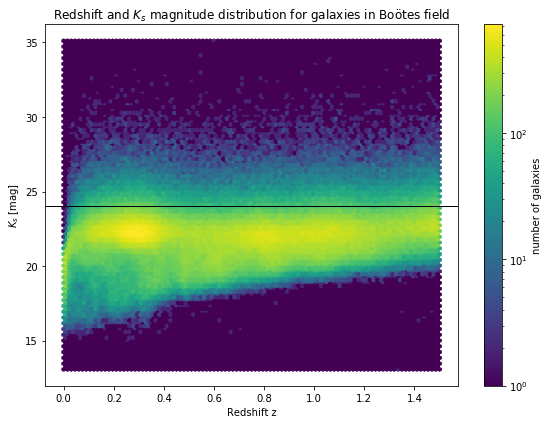

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
ax.set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax.set_xlabel("Redshift z",fontsize=10)
ax.set_ylabel("$K_s$ [mag]",fontsize=10)
hb = ax.hexbin(bootes['z'],uJyToAB(bootes['Ks_flux']),bins='log',label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('number of galaxies')
ax.axhline(24,color='k',linewidth=1)
#ax.legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Following the sample specifications of Ilbert et al. 2013 and Man et al. 2016, we will limit our sample to those galaxies with Ks < 24. As can be seen in the figure above, the majority of the sample is still included after applying this cut.

In [8]:
# Making cut in Ks magnitude
bootes = bootes[uJyToAB(bootes['Ks_flux'])<24]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 617839


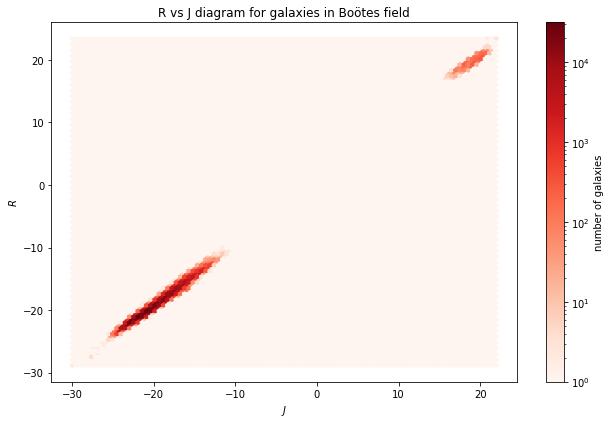

In [23]:
fig, axs = plt.subplots(figsize=(9,6))
axs.set_title('R vs J diagram for galaxies in Boötes field')
axs.set_xlabel(f"$J$",fontsize=10)
axs.set_ylabel(f"$R$",fontsize=10)
hb = axs.hexbin(bootes['J_rest_2'],bootes['R_rest_2'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
fig.tight_layout()
plt.show()

Here we get rid of the few sources with rest-frame R magnitudes higher than 0, since those are unrealistic for massive galaxies.

In [9]:
# Making cut in R magnitude
bootes = bootes[bootes['R_rest_2']<0]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 613915


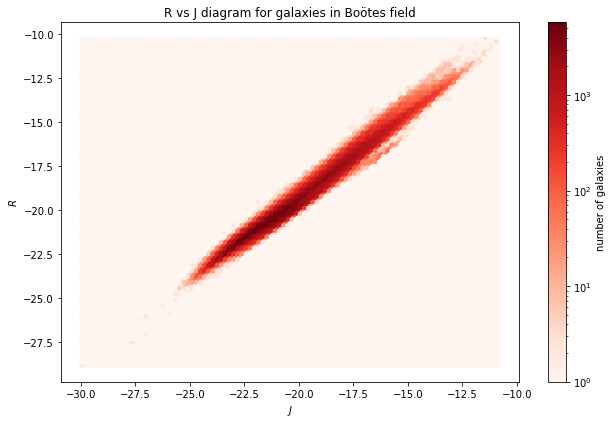

In [26]:
fig, axs = plt.subplots(figsize=(9,6))
axs.set_title('R vs J diagram for galaxies in Boötes field')
axs.set_xlabel(f"$J$",fontsize=10)
axs.set_ylabel(f"$R$",fontsize=10)
hb = axs.hexbin(bootes['J_rest_2'],bootes['R_rest_2'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
fig.tight_layout()
plt.show()

In [8]:
### Defining a cosmology entity for future calculations
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

## Exploring color-color space

By choosing three rest-frame bands (in this case, NUV, R and J), we can define two colors which we will use to select galaxies as quiescent or star-forming. In order to have easy acces to these colors for later operations, we will add two new columns to the table based on the values of other columns.

In [9]:
filter1 = 'NUV'
filter2 = 'R'
filter3 = 'J'
bootes['NUVR'] = bootes['NUV_rest']-bootes['R_rest_2']
bootes['RJ'] = bootes['R_rest_2']-bootes['J_rest_2']

In [12]:
print(len(bootes))
print(len(bootes[bootes['z']>0.1]))

613915
588286


In [13]:
bootes = bootes[bootes['z']>0.1]

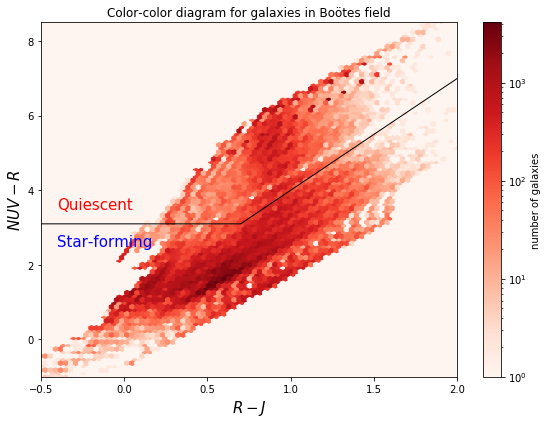

In [13]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=15)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=15)
hb = axs.hexbin(bootes['RJ'],bootes['NUVR'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.set_xlim(xmin=-0.5,xmax=2.)
axs.set_ylim(ymin=-1,ymax=8.5)
axs.text(-0.4,3.5,'Quiescent',size=15,color='r')
axs.text(-0.4,2.5,'Star-forming',size=15,color='b')
fig.tight_layout()
plt.show()

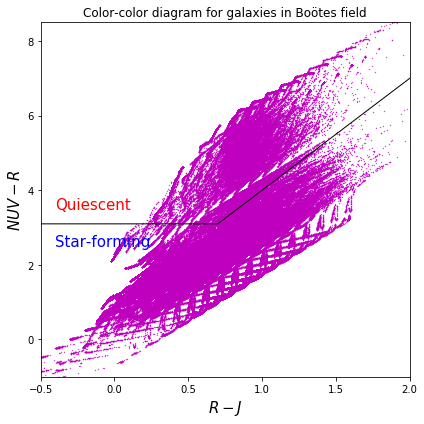

In [45]:
fig, axs = plt.subplots(figsize=(6,6))
axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=15)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=15)
axs.scatter(bootes['RJ'],bootes['NUVR'],c='m',s=0.1)
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.set_xlim(xmin=-0.5,xmax=2.)
axs.set_ylim(ymin=-1,ymax=8.5)
axs.text(-0.4,3.5,'Quiescent',size=15,color='r')
axs.text(-0.4,2.5,'Star-forming',size=15,color='b')
fig.tight_layout()
plt.show()

NameError: name 'quiescent' is not defined

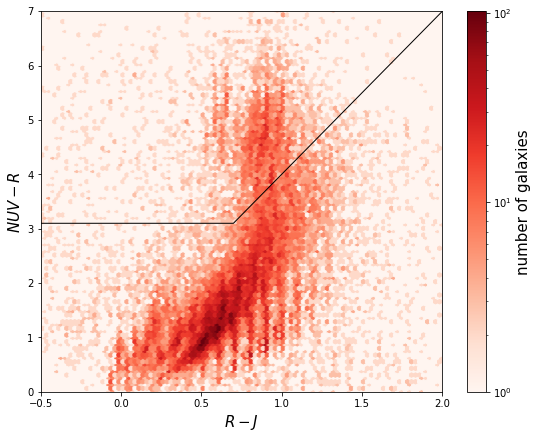

In [22]:
fig, axs = plt.subplots(figsize=(9,7))
#axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=15)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=15)
hb = axs.hexbin(bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[:,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[:,'NUVR'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies',fontsize=15)
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.set_xlim(xmin=-0.5,xmax=2)
axs.set_ylim(ymin=0,ymax=7)
axs.text(-0.4,3.2,f'Quiescent ({len(bootes.query(quiescent))})',size=15,color='r')
axs.text(-0.4,2.8,f'Star-forming ({len(bootes.query(SF))})',size=15,color='b')
axs.text(-0.4,6.5,'z ~ 0.55',size=15,color='k')
fig.tight_layout()
plt.show()

We can calculate the fraction of galaxies within the 'quiescent region', and the fraction of those that have viable data at 24 micron from MIPS.

In [10]:
quiescent = '((NUVR>3.1)&(NUVR>3*RJ+1))'
SF = '((NUVR<=3.1)|(NUVR<=3*RJ+1))'
MIPSSNR3 = '(F_MIPS_24>3*(FErr_MIPS_24_u-F_MIPS_24))&(F_MIPS_24>3*(F_MIPS_24-FErr_MIPS_24_l))'
MIPSSNR5 = '(F_MIPS_24>5*(FErr_MIPS_24_u-F_MIPS_24))&(F_MIPS_24>5*(F_MIPS_24-FErr_MIPS_24_l))'

In [15]:
final_sample = len(bootes)
n_quiescent = len(bootes.query(quiescent))
n_star_forming = len(bootes.query(SF))
print(f"Number of galaxies in sample: {final_sample}")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_mass = len(bootes.query(quiescent).loc[np.isfinite(bootes['Mass_median_2']),:])
print(f"Fraction of quiescent galaxies with stellar mass data: {q_mass/n_quiescent:.2%}")
q_MIPS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = len(bootes.query(quiescent+'&(F_MIPS_24>0)'))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR3))
print(f"Fraction of quiescent galaxies with MIPS S/N > 3: {q_MIPSSN/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR5))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}")
print("")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_mass = len(bootes.query(SF).loc[np.isfinite(bootes['Mass_median_2']),:])
print(f"Fraction of star-forming galaxies with stellar mass data: {sf_mass/n_star_forming:.2%}")
sf_MIPS = len(bootes.query(SF).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = len(bootes.query(SF+'&(F_MIPS_24>0)'))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR3))
print(f"Fraction of star-forming galaxies with MIPS S/N > 3: {sf_MIPSSN/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR5))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 588286
Number of quiescent galaxies in the sample: 107260
Fraction of quiescent galaxies with stellar mass data: 100.00%
Fraction of quiescent galaxies with MIPS data: 91.92%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 74.65%
Fraction of quiescent galaxies with MIPS S/N > 3: 17.99%
Fraction of quiescent galaxies with MIPS S/N > 5: 9.34%

Number of star-forming galaxies in the sample: 481026
Fraction of star-forming galaxies with stellar mass data: 100.00%
Fraction of star-forming galaxies with MIPS data: 92.37%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 63.71%
Fraction of star-forming galaxies with MIPS S/N > 3: 24.51%
Fraction of star-forming galaxies with MIPS S/N > 5: 16.15%


Here we will exclude galaxies with low values of stellar mass, i. e. those below 10,000,000 solar masses.

In [16]:
bootes = bootes[bootes['Mass_median_2']>=7]
final_sample=len(bootes)
n_quiescent = len(bootes.query(quiescent))
n_star_forming = len(bootes.query(SF))
print(f"Number of galaxies in sample: {final_sample}")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_mass = len(bootes.query(quiescent).loc[np.isfinite(bootes['Mass_median_2']),:])
print(f"Fraction of quiescent galaxies with stellar mass data: {q_mass/n_quiescent:.2%}")
q_MIPS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = len(bootes.query(quiescent+'&(F_MIPS_24>0)'))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR3))
print(f"Fraction of quiescent galaxies with MIPS S/N > 3: {q_MIPSSN/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR5))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}")
print("")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_mass = len(bootes.query(SF).loc[np.isfinite(bootes['Mass_median_2']),:])
print(f"Fraction of star-forming galaxies with stellar mass data: {sf_mass/n_star_forming:.2%}")
sf_MIPS = len(bootes.query(SF).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = len(bootes.query(SF+'&(F_MIPS_24>0)'))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR3))
print(f"Fraction of star-forming galaxies with MIPS S/N > 3: {sf_MIPSSN/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR5))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 586908
Number of quiescent galaxies in the sample: 107260
Fraction of quiescent galaxies with stellar mass data: 100.00%
Fraction of quiescent galaxies with MIPS data: 91.92%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 74.65%
Fraction of quiescent galaxies with MIPS S/N > 3: 17.99%
Fraction of quiescent galaxies with MIPS S/N > 5: 9.34%

Number of star-forming galaxies in the sample: 479648
Fraction of star-forming galaxies with stellar mass data: 100.00%
Fraction of star-forming galaxies with MIPS data: 92.37%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 63.67%
Fraction of star-forming galaxies with MIPS S/N > 3: 24.55%
Fraction of star-forming galaxies with MIPS S/N > 5: 16.19%


In [11]:
from scipy.interpolate import interp1d

In [12]:
z = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8])
Az = np.array([2.656,2.35,2.06,2.012,1.659,1.296,1.137,1.039,1.015,0.934,0.922,0.896,0.837,0.768,0.655])
Bz = np.array([0.975,1.02,1.056,1.065,1.094,1.129,1.159,1.179,1.165,1.149,1.145,1.149,1.158,1.175,1.198])
Az_intrp = interp1d(z, Az, kind='cubic')
Bz_intrp = interp1d(z, Bz, kind='cubic')

In [13]:
def F24_to_LIR(flux, zobj):
    '''Convert Spitzer/MIPS 24 micron flux and redshift to total IR
    luminosity according to Rujopakarn et al. (2013)    
    Input: flux in microJy, redshift
    Output: LIR in Lsun
    '''
    if (~np.isfinite(flux))|(zobj==0):
        return np.nan
    elif flux>0:
        Mpc_to_cm = 3.08568025*(10**24) # 1 Mpc in cm
        microJy_to_Jy = 10**(-6)        # 1 mJy in Jy
        D_L = cosmo.luminosity_distance(zobj).value*Mpc_to_cm # Luminosity distance in cm
        
        logLIR = Az_intrp(zobj) + Bz_intrp(zobj)*(np.log10(flux*microJy_to_Jy*4*np.pi*(D_L**2)) - 45)
        return 10**logLIR
    else:
        return np.nan

def LIR_to_SFR(LIR):
    '''Convert LIR to SFR
    Input: LIR in Lsun
    Output: SFR in Msun/yr (Kroupa 2002 IMF)
    NOTE: This conversion is calibrated for LIR > 5*10^9, if given a lower value it will return an extrapolation
    '''
    if ~np.isfinite(LIR):
        return np.nan
    else:
        L24 = 10**((np.log10(LIR) - 1.096)/0.982)
        
        if (LIR < 1.3*10**12):
            SFR = L24*7.8*10**(-10)
        else:
            SFR = (L24*7.8*10**(-10))*(L24*6.2*10**(-12))**0.048
        return SFR

V_LIR24 = np.vectorize(F24_to_LIR)

In [19]:
#bootes['LIR_24'] = pd.Series([F24_to_LIR(flux,zobj) for flux, zobj in zip(bootes['F_MIPS_24'],bootes['Z_BEST'])],index=bootes.index)
bootes['LIR_24'] = V_LIR24(bootes['F_MIPS_24'],bootes['z'])
#pd.Series([LIR_to_SFR(LIR) for LIR in bootes['LIR_24']])
bootes['SFR_24'] = bootes['LIR_24'].apply(LIR_to_SFR)

In [14]:
numbers = pd.read_csv(path+'Bootes/Bootes_selected_indexes.csv')

In [15]:
bootes_1 = bootes.loc[list(numbers['numbers'])]
bootes_1

RA_1      DEC_1   Ks_flux  F_MIPS_24  FErr_MIPS_24_u  \
27793   216.498264  32.494760  3.512863  -7.441053       -2.831475   
27808   216.491652  32.494870  6.181403  11.109215       23.679974   
27829   216.489419  32.494971  1.501215 -11.090959       -2.741589   
27866   216.496723  32.495209  5.548010   9.220480       19.309473   
27917   216.486073  32.495579  4.532667  11.144110       23.715261   
...            ...        ...       ...        ...             ...   
833312  217.947791  35.804478  1.947029  -2.566529       -0.637030   
833371  218.798672  35.805042  1.214568  -5.773238       -1.406712   
833376  218.807338  35.805079  1.149901   6.873918       15.734645   
833414  218.501095  35.805385  1.369673 -47.910187      -26.298004   
833436  217.958148  35.805601  1.946982  50.933136       67.629330   

        FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  F_SPIRE_350  \
27793       -16.825075         NaN         NaN          NaN          NaN   
27808         3.154676         NaN         NaN          NaN          NaN   
27829       -23.543840         NaN         NaN          NaN          NaN   
27866         2.528946         NaN         NaN          NaN          NaN   
27917         2.764907         NaN         NaN          NaN          NaN   
...                ...         ...         ...          ...          ...   
833312       -6.369608         NaN         NaN          NaN          NaN   
833371      -12.738770         NaN         NaN          NaN          NaN   
833376        1.807881         NaN         NaN          NaN          NaN   
833414      -69.547730         NaN         NaN          NaN          NaN   
833436       34.708590    3.331983    7.581618     2.078657     2.833087   

        F_SPIRE_500  Z_BEST       z  Mass_median_2   R_rest_2   J_rest_2  \
27793           NaN  0.9440  0.9440       9.241641 -19.496592 -19.691084   
27808           NaN  1.3521  1.3521       9.248381 -19.441881 -19.973963   
27829           NaN  1.0198  1.0198       9.604297 -20.407099 -20.566385   
27866           NaN  1.0496  1.0496       9.420806 -19.973715 -20.101397   
27917           NaN  0.2735  0.2735       7.611224 -16.351587 -17.265139   
...             ...     ...     ...            ...        ...        ...   
833312          NaN  0.5235  0.5235       9.291525 -19.021177 -19.492975   
833371          NaN  1.2111  1.2111       8.874194 -19.568163 -19.878206   
833376          NaN  0.1335  0.1335       7.717172 -15.063997 -15.387777   
833414          NaN  0.9100  0.9100       9.648840 -20.200373 -21.095670   
833436     2.549019  0.8978  0.8978       9.946227 -20.493280 -21.145655   

         NUV_rest S_Code      NUVR        RJ  
27793  -17.930940    NaN  1.565652  0.194492  
27808  -18.652987    NaN  0.788894  0.532082  
27829  -18.807463    NaN  1.599636  0.159286  
27866  -18.509367    NaN  1.464348  0.127682  
27917  -14.768457    NaN  1.583130  0.913552  
...           ...    ...       ...       ...  
833312 -16.895422    NaN  2.125755  0.471798  
833371 -18.887213    NaN  0.680950  0.310043  
833376 -12.825384    NaN  2.238613  0.323780  
833414 -18.237356    NaN  1.963017  0.895297  
833436 -17.731890    NaN  2.761390  0.652375  

[525493 rows x 20 columns]

In [16]:
#bootes['LIR_24'] = pd.Series([F24_to_LIR(flux,zobj) for flux, zobj in zip(bootes['F_MIPS_24'],bootes['Z_BEST'])],index=bootes.index)
bootes_1['LIR_24'] = V_LIR24(bootes_1['F_MIPS_24'],bootes_1['z'])
#pd.Series([LIR_to_SFR(LIR) for LIR in bootes['LIR_24']])
bootes_1['SFR_24'] = bootes_1['LIR_24'].apply(LIR_to_SFR)

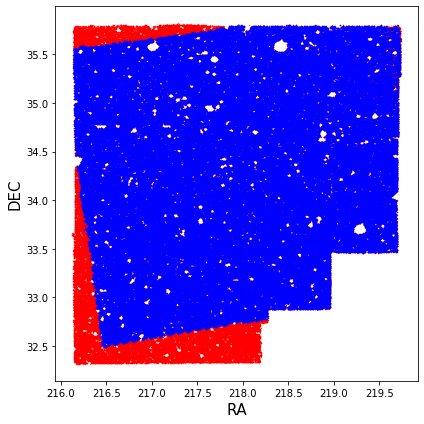

In [49]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(bootes['RA'],bootes['DEC'],s=0.1,color='r')
ax.scatter(bootes_1['RA'],bootes_1['DEC'],s=0.1,color='b')
ax.set_xlabel('RA',size=15)
ax.set_ylabel('DEC',size=15)
fig.tight_layout()
plt.show()

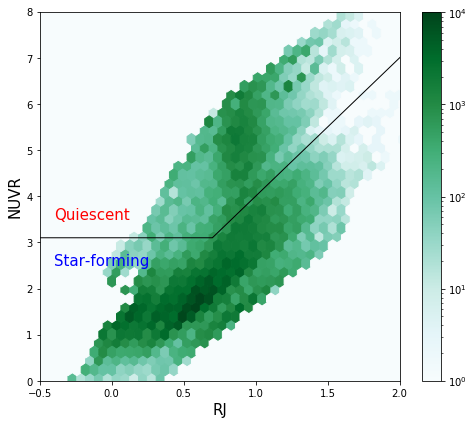

In [80]:
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlabel('$R - J$',size=15)
ax.set_ylabel('$NUV - R$',size=15)
bootes_1.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax,gridsize=50)
ax.plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=1,label='Color selection boundary')
ax.text(-0.4,3.5,'Quiescent',size=15,color='r')
ax.text(-0.4,2.5,'Star-forming',size=15,color='b')
ax.set_xlim(-0.5,2)
ax.set_ylim(0,8)
fig.tight_layout()
plt.show()

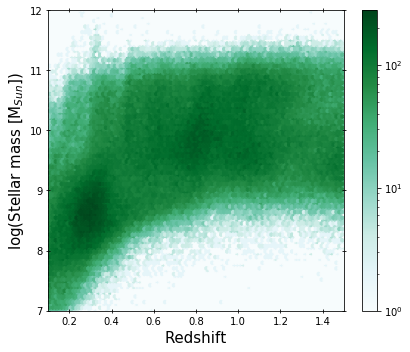

In [60]:
fig, ax = plt.subplots(figsize=(6,5))
bootes_1.plot.hexbin(x='z',y='Mass_median_2',bins='log',ax=ax)
ax.set_xlabel('Redshift',size=15)
ax.set_ylabel('log(Stellar mass [M$_{Sun}$])',size=15)
ax.set_xlim(0.1,1.5)
ax.set_ylim(7,12)
ax.tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

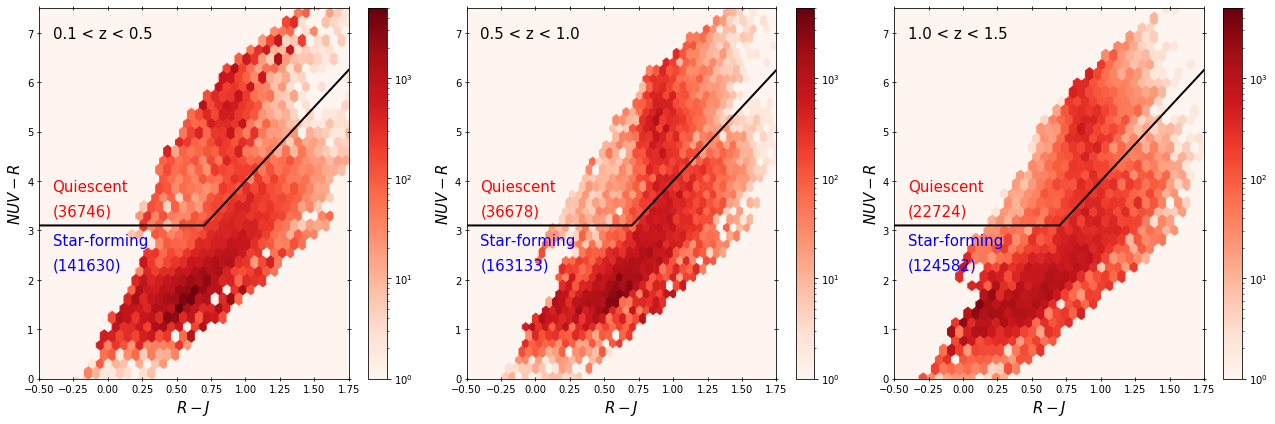

In [58]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=5000,cmap='Reds')
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

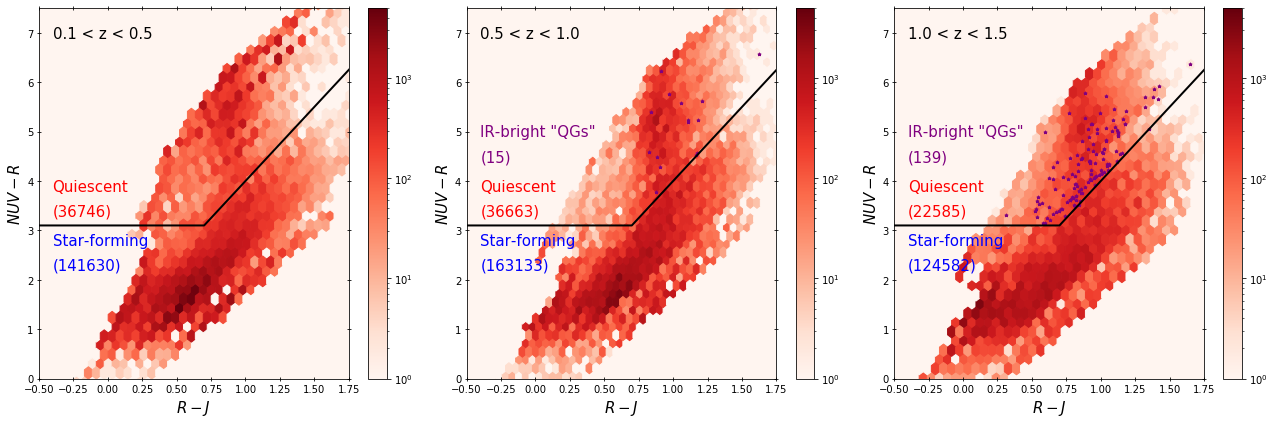

In [57]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=5000,cmap='Reds')
    ax[i].scatter(data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'RJ'],
                  data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'NUVR'],
                  color='purple',marker='*',s=10)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&((data['SFR_24']<=100)|(~np.isfinite(data['SFR_24'])))])
    irbqg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])    
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    if irbqg!=0:
        ax[i].text(-0.4,4.9,f'IR-bright "QGs"',size=15,color='purple')
        ax[i].text(-0.4,4.4,f'({irbqg})',size=15,color='purple')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

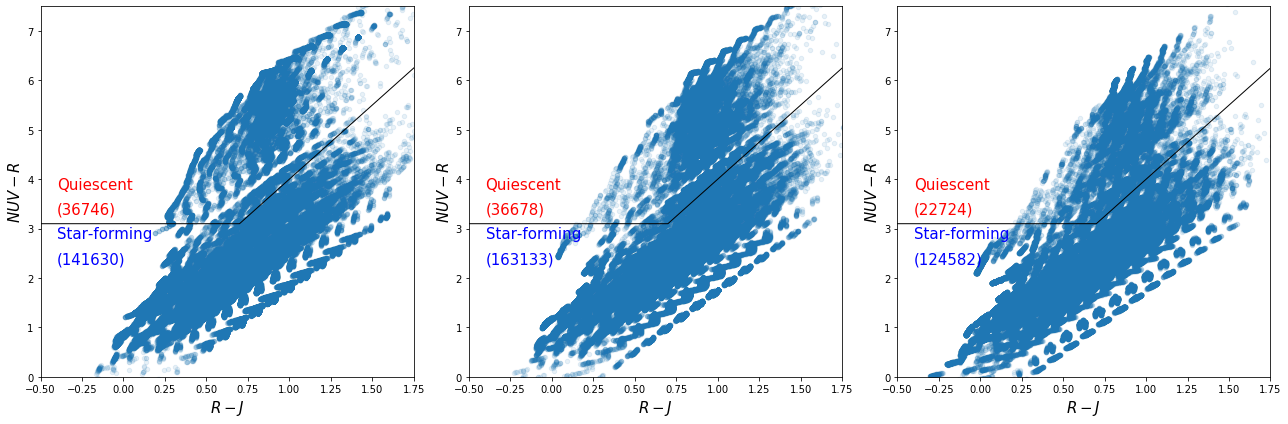

In [70]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.scatter(x='RJ',y='NUVR',ax=ax[i],alpha=0.1)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=1,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.8,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.3,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
fig.tight_layout()
plt.show()

In [24]:
## Schreiber+15 Main sequence
m = np.arange(7,12.4,0.2)-9
z1 = 0.3
z2 = 0.75
z3 = 1.25
r1 = np.log10(1+z1)
r2 = np.log10(1+z2)
r3 = np.log10(1+z3)
logSFR1 = m - 0.5 + (1.5*r1) - 0.3*(np.fmax(m - 0.36-2.5*r1,np.zeros(len(m))))**2
logSFR2 = m - 0.5 + (1.5*r2) - 0.3*(np.fmax(m - 0.36-2.5*r2,np.zeros(len(m))))**2
logSFR3 = m - 0.5 + (1.5*r3) - 0.3*(np.fmax(m - 0.36-2.5*r3,np.zeros(len(m))))**2
## Carnall+20 sSFR quiescent limit
age_1 = cosmo.age(z1).value
age_2 = cosmo.age(z2).value
age_3 = cosmo.age(z3).value
factor_1 = np.log10(0.2/age_1)-9
factor_2 = np.log10(0.2/age_2)-9
factor_3 = np.log10(0.2/age_3)-9

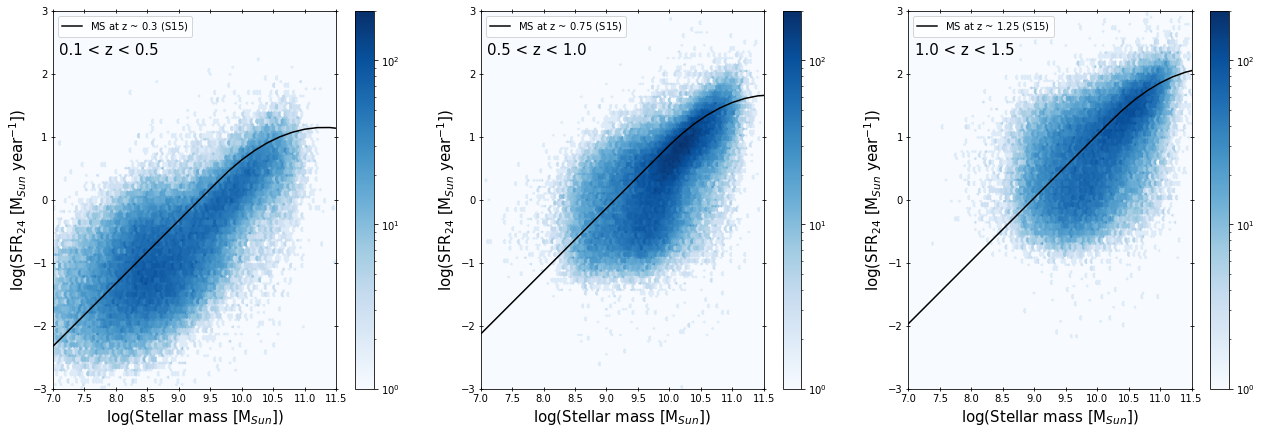

In [55]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(SF).loc[:,'Mass_median_2'],
                       np.log10(data.query(SF).loc[:,'SFR_24']),
                       cmap='Blues',bins='log',vmax=200)
    cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{Sun}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{Sun}$ year$^{-1}$])',size=15)
    ax[i].text(7.1,2.3,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Blues')
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
    ax[i].legend(loc='upper left')
fig.tight_layout()
plt.show()

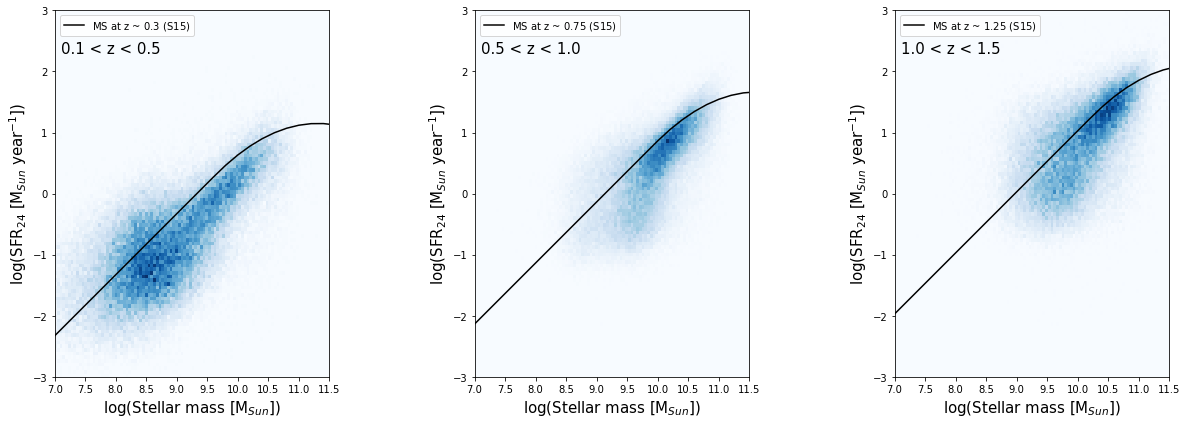

In [39]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hist2d(data.query(SF).loc[:,'Mass_median_2'],
                       np.log10(data.query(SF).loc[:,'SFR_24']),
                       cmap='Blues',bins=100,range=[[7,11.5],[-3,3]])
    #cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{Sun}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{Sun}$ year$^{-1}$])',size=15)
    ax[i].text(7.1,2.3,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Blues')
    ax[i].legend(loc='upper left')
fig.tight_layout()
plt.show()

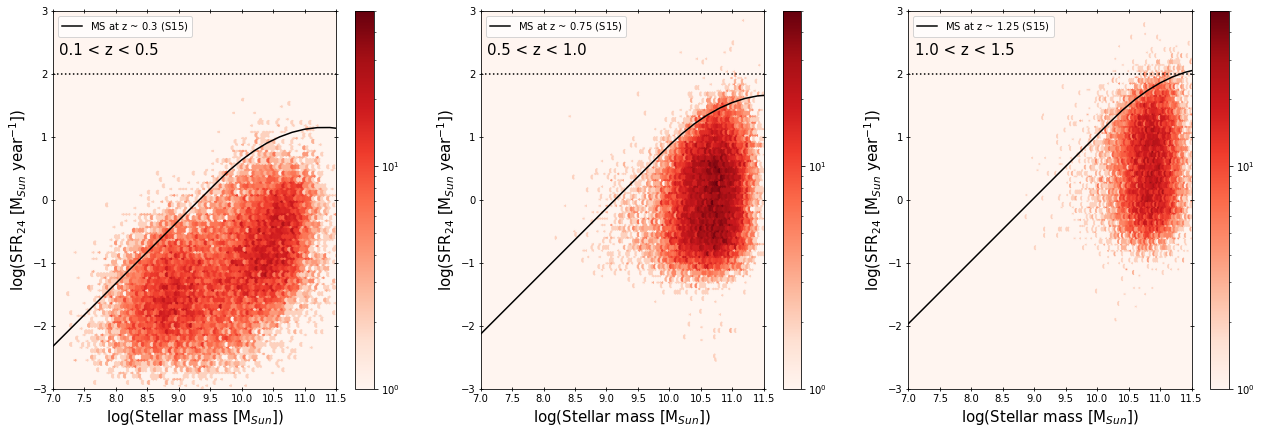

In [56]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(quiescent).loc[:,'Mass_median_2'],
                       np.log10(data.query(quiescent).loc[:,'SFR_24']),
                       cmap='Reds',bins='log',vmax=50)
    cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{Sun}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{Sun}$ year$^{-1}$])',size=15)
    ax[i].text(7.1,2.3,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Reds')
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
    ax[i].legend(loc='upper left')
    ax[i].plot([7,11.5],[2,2],ls=':',color='k')
fig.tight_layout()
plt.show()

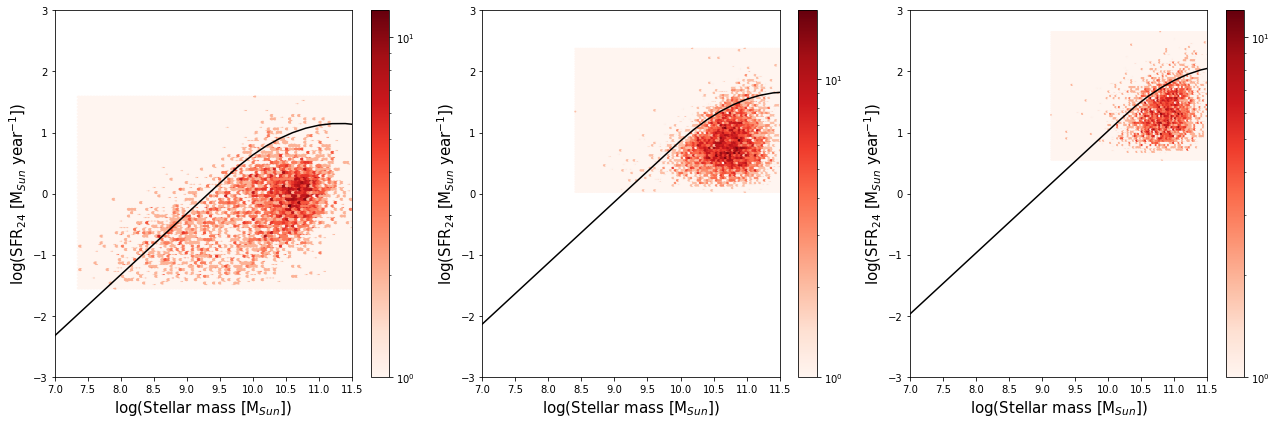

In [109]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(quiescent+'&'+MIPSSNR3).loc[:,'Mass_median_2'],
                       np.log10(data.query(quiescent+'&'+MIPSSNR3).loc[:,'SFR_24']),
                       cmap='Reds',bins='log')
    cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{Sun}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{Sun}$ year$^{-1}$])',size=15)
    #ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
fig.tight_layout()
plt.show()

## Grouping galaxies by type and stellar mass

Here we can difine criteria to group by galaxy type (i.e. quiescent or star-forming) and in different stellar mass bins.

In [25]:
def galaxy_type(NUVR,RJ):
    if ((NUVR>3.1)&(NUVR>3*RJ+1)):
        return 'QG'
    else:
        return 'SFG'

galaxy_type_v=np.vectorize(galaxy_type)

In [39]:
grouped = bootes.groupby(galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']))
grouped.size()

QG     107260
SFG    479648
dtype: int64

In [41]:
grouped = bootes_1.groupby(galaxy_type_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ']))
grouped.size()

QG      96148
SFG    429345
dtype: int64

In [17]:
def galaxy_type_new(NUVR,RJ,SFR):
    if ((NUVR>3.1)&(NUVR>3*RJ+1)):
        if SFR>100:
            return 'IRBQG'
        else:
            return 'QG'
    else:
        return 'SFG'

galaxy_type_new_v=np.vectorize(galaxy_type_new)

In [43]:
grouped = bootes.groupby(galaxy_type_new_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ'],bootes.loc[:,'SFR_24']))
grouped.size()

IRBQG       166
QG       107094
SFG      479648
dtype: int64

In [44]:
grouped = bootes_1.groupby(galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1.loc[:,'SFR_24']))
grouped.size()

IRBQG       154
QG        95994
SFG      429345
dtype: int64

In [18]:
def create_bins(number,bin_width=1):
    q = np.floor(number/bin_width)
    return q*bin_width

In [85]:
#grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median']),create_bins(bootes.loc[:,'Z_BEST'],0.05)])
grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median_2'])])
grouped.size()

     Mass_median_2
QG   7.0                3700
     8.0               18721
     9.0               21819
     10.0              61690
     11.0              12639
     12.0                  3
SFG  7.0               32419
     8.0              119186
     9.0              215495
     10.0             119089
     11.0               4402
     12.0                  4
dtype: int64

In [47]:
#grouped = bootes_1.groupby([galaxy_type_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ']),create_bins(bootes_1.loc[:,'Mass_median']),create_bins(bootes_1.loc[:,'Z_BEST'],0.05)])
grouped = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'Mass_median_2']),create_bins(bootes_1.loc[:,'z'],0.5)])
grouped.size()

       Mass_median_2  z  
IRBQG  10.0           0.5        8
                      1.0       58
       11.0           0.5        7
                      1.0       81
QG     7.0            0.0      591
       8.0            0.0    11655
                      0.5      108
                      1.0       12
       9.0            0.0    12914
                      0.5     3719
                      1.0      551
       10.0           0.0    10681
                      0.5    28126
                      1.0    16215
       11.0           0.0      898
                      0.5     4702
                      1.0     5820
       12.0           0.0        1
                      0.5        1
SFG    7.0            0.0    20719
                      0.5      271
                      1.0       69
       8.0            0.0    72372
                      0.5    23121
                      1.0     8994
       9.0            0.0    36729
                      0.5    88354
                      1.0    

In [32]:
grouped.get_group(('QG',9.0)).loc[:,['RA','DEC']]

RA        DEC
1421     217.641819  32.332376
1814     217.636139  32.333597
5476     218.018226  32.344477
6701     216.523463  32.348084
7761     216.879990  32.351056
...             ...        ...
1492622  218.612276  35.671030
1493197  218.838024  35.672254
1494419  217.795812  35.674661
1495133  216.210508  35.676055
1497903  217.092802  35.681588

[688 rows x 2 columns]

In [94]:
grouped.groups.keys()

dict_keys([('IRBQG', 10.0, 0.5), ('IRBQG', 10.0, 1.0), ('IRBQG', 11.0, 0.5), ('IRBQG', 11.0, 1.0), ('QG', 7.0, 0.0), ('QG', 7.0, 1.0), ('QG', 8.0, 0.0), ('QG', 8.0, 0.5), ('QG', 8.0, 1.0), ('QG', 9.0, 0.0), ('QG', 9.0, 0.5), ('QG', 9.0, 1.0), ('QG', 10.0, 0.0), ('QG', 10.0, 0.5), ('QG', 10.0, 1.0), ('QG', 11.0, 0.0), ('QG', 11.0, 0.5), ('QG', 11.0, 1.0), ('QG', 12.0, 0.0), ('QG', 12.0, 0.5), ('SFG', 7.0, 0.0), ('SFG', 7.0, 0.5), ('SFG', 7.0, 1.0), ('SFG', 8.0, 0.0), ('SFG', 8.0, 0.5), ('SFG', 8.0, 1.0), ('SFG', 9.0, 0.0), ('SFG', 9.0, 0.5), ('SFG', 9.0, 1.0), ('SFG', 10.0, 0.0), ('SFG', 10.0, 0.5), ('SFG', 10.0, 1.0), ('SFG', 11.0, 0.0), ('SFG', 11.0, 0.5), ('SFG', 11.0, 1.0), ('SFG', 12.0, 0.5), ('SFG', 12.0, 1.0)])

## Opening LOFAR and Herschel maps for Bootes field

In [14]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import wcs
#from astropy.wcs.utils import pixel_to_skycoord

In [15]:
# Opening LOFAR map
hdulist = fits.open(path+'Bootes/Maps/BO_image_full_ampphase_di_m.NS_shift.int.facetRestored.blanked.scaled-crop.fits',memmap=True)
w_lofar = wcs.WCS(hdulist[0].header,naxis=2) # TAKE ONLY THE FIRST 2 DIMENSIONS (RA,DEC)

In [65]:
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                19845                                                  
NAXIS2  =                19845                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               9923.0 / Pixel coordinate of reference point            
CRPIX2  =               9923.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [16]:
print(w_lofar)
print("Map unit : ",hdulist[0].header['BUNIT'])
pixscale_lofar = hdulist[0].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_lofar," arcseconds")
imdata_lofar = hdulist[0].data[0][0] # ONLY THE FIRST 2 DIMENSIONS (RA,DEC)
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 218.0  34.5  
CRPIX : 9923.0  9923.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666667  0.00041666666666667  
NAXIS : 19845  19845  1  1
Map unit :  Jy/beam
Pixel scale :  1.500000000000012  arcseconds


In [17]:
# Opening SPIRE 250 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_250_SMAP_v6.0.fits',memmap=True)
w_250 = wcs.WCS(hdulist[1].header)

In [101]:
hdulist[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 2315 /                                                
NAXIS2  =                 2354 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
COMMENT                                                                         
COMMENT  This is a header for an SMAP pipeline product.                         
COMMENT                                                                         
TIMESYS = 'UTC     '           / All dates are in UTC time                      
CREATOR = 'SMAP    '           / User who created this header                   
DATE    = '2015-02-6T12:42:1

In [18]:
print(w_250)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_250 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_250," arcseconds")
imdata_250 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 1158.0  1171.0  
CD1_1 CD1_2  : -0.00166666670702  0.0  
CD2_1 CD2_2  : 0.0  0.00166666670702  
NAXIS : 2315  2354
Map unit :  Jy / beam
Pixel scale :  6.000000145272001  arcseconds


In [19]:
# Opening SPIRE 350 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_350_SMAP_v6.0.fits',memmap=True)
w_350 = wcs.WCS(hdulist[1].header)

In [104]:
hdulist[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 1667 /                                                
NAXIS2  =                 1695 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
COMMENT                                                                         
COMMENT  This is a header for an SMAP pipeline product.                         
COMMENT                                                                         
TIMESYS = 'UTC     '           / All dates are in UTC time                      
CREATOR = 'SMAP    '           / User who created this header                   
DATE    = '2015-02-6T12:42:2

In [20]:
print(w_350)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_350 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_350," arcseconds")
imdata_350 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 834.0  843.0  
CD1_1 CD1_2  : -0.00231481483206  0.0  
CD2_1 CD2_2  : 0.0  0.00231481483206  
NAXIS : 1667  1695
Map unit :  Jy / beam
Pixel scale :  8.333333395416  arcseconds


In [21]:
# Opening SPIRE 500 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_500_SMAP_v6.0.fits',memmap=True)
w_500 = wcs.WCS(hdulist[1].header)

In [107]:
hdulist[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 1159 /                                                
NAXIS2  =                 1177 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
COMMENT                                                                         
COMMENT  This is a header for an SMAP pipeline product.                         
COMMENT                                                                         
TIMESYS = 'UTC     '           / All dates are in UTC time                      
CREATOR = 'SMAP    '           / User who created this header                   
DATE    = '2015-02-6T12:42:2

In [22]:
print(w_500)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_500 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_500," arcseconds")
imdata_500 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 580.0  586.0  
CD1_1 CD1_2  : -0.00333333341405  0.0  
CD2_1 CD2_2  : 0.0  0.00333333341405  
NAXIS : 1159  1177
Map unit :  Jy / beam
Pixel scale :  12.00000029058  arcseconds


In [23]:
# Opening PACS 100 map
#hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level5_Bootes_HerMES_100um_EdoIbar_Unimap.fits',memmap=True)
hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level6_Bootes_NDWFS_100um_EdoIbar_Unimap.fits',memmap=True)
w_100 = wcs.WCS(hdulist[1].header)

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


In [92]:
# Opening PACS 100 map
hdulist = fits.open(path+'Bootes/HerMES_PACS_level5_Bootes_HerMES_100um_EdoIbar_Unimap.fits',memmap=True)
w_100_2 = wcs.WCS(hdulist[1].header)

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


In [110]:
hdulist[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 6683                                                  
NAXIS2  =                 6868                                                  
BSCALE  =                    1                                                  
BZERO   =                    0                                                  
IMG_TYPE= 'wgls    '                                                            
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRPIX1  =          3341.103027                                                  
CRPIX2  =           3433.614

In [24]:
print(w_100)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_100 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_100," arcseconds")
imdata_100 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 217.8166656  34.37254715  
CRPIX : 3341.103027  3433.61499  
NAXIS : 6683  6868
Map unit :  Jy/pix
Pixel scale :  2.0000000484  arcseconds


In [94]:
print(w_100_2)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_100_2 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_100_2," arcseconds")
imdata_100_2 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 217.8814392  34.35683441  
CRPIX : 2070.92749  2091.095947  
NAXIS : 4143  4183
Map unit :  Jy/pix
Pixel scale :  3.0000000726000002  arcseconds


In [25]:
# Opening PACS 160 map
#hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level5_Bootes_HerMES_160um_EdoIbar_Unimap.fits',memmap=True)
hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level6_Bootes_NDWFS_160um_EdoIbar_Unimap.fits',memmap=True)
w_160 = wcs.WCS(hdulist[1].header)

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


In [96]:
# Opening PACS 160 map
hdulist = fits.open(path+'Bootes/HerMES_PACS_level5_Bootes_HerMES_160um_EdoIbar_Unimap.fits',memmap=True)
w_160_2 = wcs.WCS(hdulist[1].header)

In [113]:
hdulist[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 4456                                                  
NAXIS2  =                 4576                                                  
BSCALE  =                    1                                                  
BZERO   =                    0                                                  
IMG_TYPE= 'wgls    '                                                            
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRPIX1  =          2227.411621                                                  
CRPIX2  =          2287.6923

In [26]:
print(w_160)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_160 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_160," arcseconds")
imdata_160 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 217.8177643  34.37342453  
CRPIX : 2227.411621  2287.692383  
NAXIS : 4456  4576
Map unit :  Jy/pix
Pixel scale :  3.0000000726000002  arcseconds


In [97]:
print(w_160_2)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_160_2 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_160_2," arcseconds")
imdata_160_2 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 217.8825226  34.35832214  
CRPIX : 1380.670654  1393.148438  
NAXIS : 2762  2787
Map unit :  Jy/pix
Pixel scale :  3.0000000726000002  arcseconds


## Removing sources not found in PACS map

In [118]:
bootes_1 = bootes.copy()

In [119]:
def create_mask(image_data,W,pixscale,FWHM):
    bool_mask=[]
    for ra,dec in zip(bootes_1.loc[:,'RA'],bootes_1.loc[:,'DEC']):
        world_coords = [ra,dec]                                # world coordinates
        pixel_coords = W.all_world2pix([world_coords], 0)      # pixel coordinates
        position = (pixel_coords[0][0],pixel_coords[0][1])     # position to create cutout
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2)          # cutout size in pixels
        try:
            cutout = Cutout2D(image_data, position, size, mode='partial') # create cutout, no trimming
        except:
            bool_mask.append(False)
            continue
        
        if np.isnan(cutout.data).any():
            bool_mask.append(False)
        else:
            bool_mask.append(True)
    return bool_mask

In [120]:
bool_mask = create_mask(imdata_100,w_100,pixscale_100,6.8)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

586908
553156


In [121]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

553156

In [122]:
bool_mask = create_mask(imdata_160,w_160,pixscale_160,11.)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

553156
550558


In [123]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

550558

In [124]:
bool_mask = create_mask(imdata_250,w_250,pixscale_250,18.2)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

550558
529037


In [125]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

529037

In [126]:
bool_mask = create_mask(imdata_350,w_350,pixscale_350,24.9)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

529037
528078


In [127]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

528078

In [128]:
bool_mask = create_mask(imdata_500,w_500,pixscale_500,36.3)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

528078
525493


In [129]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

525493

In [130]:
bool_mask = create_mask(imdata_lofar,w_lofar,pixscale_lofar,6.)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

525493
525493


In [131]:
bootes_1 = bootes_1[bool_mask]
len(bootes_1)

525493

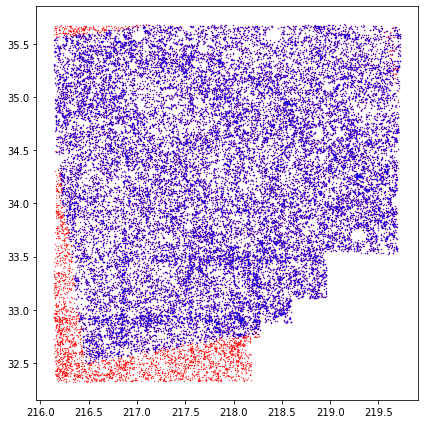

In [61]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(bootes['RA'],bootes['DEC'],s=0.1,color='r')
ax.scatter(bootes_1['RA'],bootes_1['DEC'],s=0.1,color='b')
fig.tight_layout()
plt.show()

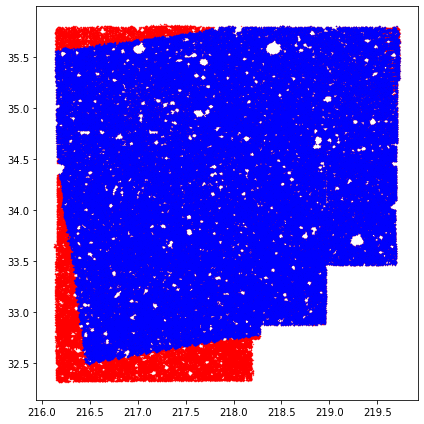

In [132]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(bootes['RA'],bootes['DEC'],s=0.1,color='r')
ax.scatter(bootes_1['RA'],bootes_1['DEC'],s=0.1,color='b')
fig.tight_layout()
plt.show()

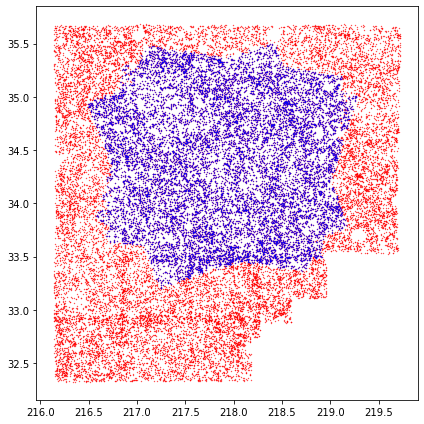

In [121]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(bootes['RA'],bootes['DEC'],s=0.1,color='r')
ax.scatter(bootes_1['RA'],bootes_1['DEC'],s=0.1,color='b')
fig.tight_layout()
plt.show()

In [77]:
#grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median']),create_bins(bootes.loc[:,'Z_BEST'],0.05)])
grouped_1 = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'Mass_median_2']),create_bins(bootes_1.loc[:,'z'],0.5)])
grouped_1.size()

       Mass_median_2  z  
IRBQG  10.0           0.5        8
                      1.0       58
       11.0           0.5        7
                      1.0       81
QG     7.0            0.0      591
       8.0            0.0    11655
                      0.5      108
                      1.0       12
       9.0            0.0    12914
                      0.5     3719
                      1.0      551
       10.0           0.0    10681
                      0.5    28126
                      1.0    16215
       11.0           0.0      898
                      0.5     4702
                      1.0     5820
       12.0           0.0        1
                      0.5        1
SFG    7.0            0.0    20719
                      0.5      271
                      1.0       69
       8.0            0.0    72372
                      0.5    23121
                      1.0     8994
       9.0            0.0    36729
                      0.5    88354
                      1.0    

In [78]:
#grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median']),create_bins(bootes.loc[:,'Z_BEST'],0.05)])
grouped_1 = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'Mass_median_2'],0.5),create_bins(bootes_1.loc[:,'z'],0.5)])
grouped_1.size()

       Mass_median_2  z  
IRBQG  10.0           0.5       2
                      1.0       5
       10.5           0.5       6
                      1.0      53
       11.0           0.5       7
                             ... 
SFG    11.0           1.0    2621
       11.5           0.0       1
                      0.5       5
                      1.0      11
       12.0           1.0       3
Length: 65, dtype: int64

In [22]:
bootes_1 = bootes_1.loc[bootes_1['Mass_median_2']>=9]

In [20]:
binwidth=0.15

In [29]:
#grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median']),create_bins(bootes.loc[:,'Z_BEST'],0.05)])
grouped_1 = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'Mass_median_2'],binwidth),create_bins(bootes_1.loc[:,'z'],0.5)])
grouped_1.size()

       Mass_median_2  z  
IRBQG  10.05          0.5    1
       10.20          1.0    3
       10.35          0.5    1
                      1.0    2
       10.50          0.5    2
                            ..
SFG    11.70          0.5    2
       11.85          0.0    1
                      1.0    1
       12.15          1.0    2
       12.30          1.0    1
Length: 137, dtype: int64

In [23]:
#grouped = bootes.groupby([galaxy_type_v(bootes.loc[:,'NUVR'],bootes.loc[:,'RJ']),create_bins(bootes.loc[:,'Mass_median']),create_bins(bootes.loc[:,'Z_BEST'],0.05)])
grouped_1 = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'Mass_median_2'],binwidth),create_bins(bootes_1.loc[:,'z'],0.5)])
grouped_1.size()

       Mass_median_2  z  
IRBQG  10.05          0.5    1
       10.20          1.0    3
       10.35          0.5    1
                      1.0    2
       10.50          0.5    2
                            ..
SFG    11.70          0.5    2
       11.85          0.0    1
                      1.0    1
       12.15          1.0    2
       12.30          1.0    1
Length: 137, dtype: int64

In [141]:
bootes_1.index

Int64Index([ 27793,  27808,  27829,  27866,  27917,  27972,  27976,  28066,
             28121,  28326,
            ...
            833253, 833269, 833290, 833304, 833307, 833312, 833371, 833376,
            833414, 833436],
           dtype='int64', length=525493)

In [143]:
bootes_1.index.values

array([ 27793,  27808,  27829, ..., 833376, 833414, 833436])

In [30]:
bootes_1.count()

RA_1              387581
DEC_1             387581
Ks_flux           387581
F_MIPS_24         372514
FErr_MIPS_24_u    372514
FErr_MIPS_24_l    372514
F_PACS_100        177743
F_PACS_160        177743
F_SPIRE_250       177743
F_SPIRE_350       177743
F_SPIRE_500       177743
Z_BEST            387581
z                 387581
Mass_median_2     387581
R_rest_2          387581
J_rest_2          387581
NUV_rest          387581
S_Code              7209
NUVR              387581
RJ                387581
LIR_24            285074
SFR_24            285074
dtype: int64

## Extracting fluxes from stacked image cutouts

In [30]:
### Packages for aperture photometry
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.stats import bootstrap 

In [80]:
cutout_list=[]
for ra,dec in zip(grouped_1.get_group(('SFG',11.0,1.)).loc[:,'RA'],grouped_1.get_group(('SFG',11.0,1.)).loc[:,'DEC']):
    world_coords = [ra,dec]
    pixel_coords = w_lofar.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (6.0*2/pixscale_lofar+2, 6.0*2/pixscale_lofar+2) # twice the fwhm plus 2 pixels
    cutout = Cutout2D(imdata_lofar, position, size,mode='partial') # no trimming of cutouts
    cutout_list.append(cutout.data)

In [83]:
arr=np.array(cutout_list)

In [169]:
boot_arr=bootstrap(arr,bootnum=100)

In [170]:
median_arr=np.median(boot_arr,axis=1)

In [171]:
len(median_arr)

100

In [172]:
median_list=[]
for n in median_arr:
    aperture = CircularAperture((6./pixscale_lofar+0.5,6./pixscale_lofar+0.5),r=6./pixscale_lofar)
    phot_table = aperture_photometry(n, aperture)
    median_list.append(phot_table['aperture_sum'][0])
median_list

[0.00354917793894932,
 0.0035124745081458577,
 0.0042857095112293015,
 0.0034993254439633446,
 0.004112222378775825,
 0.0037957291292805805,
 0.003764038723931362,
 0.004427363215330856,
 0.0037794233691476973,
 0.0038442909742696855,
 0.003870029748928576,
 0.003530011803577572,
 0.003693652450158183,
 0.004139532506441428,
 0.0036974869848957815,
 0.003864736140051143,
 0.004187419587515183,
 0.004427010932565,
 0.003313771584702354,
 0.00416759583011842,
 0.0040433700044810224,
 0.0034421325868468486,
 0.003958469382023168,
 0.0039576041384538916,
 0.003910658088311528,
 0.0037660828630081784,
 0.003803701420513092,
 0.004249093047578298,
 0.0033059813116164743,
 0.004035030612328305,
 0.0038583392638839712,
 0.0033793090062060605,
 0.0036378919976417763,
 0.00415514692145119,
 0.003980734013996531,
 0.004169899914913409,
 0.004504981382875766,
 0.00422522250076084,
 0.003694078362809374,
 0.0038234408911560465,
 0.0036523220433700614,
 0.003359687365716938,
 0.0036938625445847376,


In [196]:
boot_arr = bootstrap(np.arange(len(arr))).astype(int)
print(len(boot_arr))
print(boot_arr)

median_list=[]
for n in boot_arr:
    stack = arr[n]
    stack = np.median(stack,axis=0)
    aperture = CircularAperture((6./pixscale_lofar+0.5,6./pixscale_lofar+0.5),r=6./pixscale_lofar)
    phot_table = aperture_photometry(stack, aperture)
    median_list.append(phot_table['aperture_sum'][0])
median_list

100
[[205  56 157 ... 126  36 112]
 [  1 173  43 ... 200  40 214]
 [ 83 190 189 ... 157  78  76]
 ...
 [200 126 168 ...  74 114  74]
 [216  75 170 ... 221 215 220]
 [ 16  70 133 ... 126 200 128]]


[0.0036931181297532503,
 0.00331310044453206,
 0.0043133049280180595,
 0.0037587682611661694,
 0.004124316221882935,
 0.004155316015202539,
 0.0038307282451384727,
 0.0037782748800244082,
 0.003554787981585451,
 0.003682608741114573,
 0.004220063581237378,
 0.004058471783907201,
 0.0035116239730837518,
 0.004021335463575703,
 0.003767265073232176,
 0.004000647768654124,
 0.003959983312640173,
 0.0038893039975583417,
 0.0031869289954054294,
 0.003882354427852351,
 0.0037059579562674586,
 0.003826656366465885,
 0.0050671688327618555,
 0.003913147670229331,
 0.003785217240297954,
 0.003913221378657868,
 0.004306738014198607,
 0.0036614466829361083,
 0.004436906791045785,
 0.00433221765676802,
 0.004360396632274649,
 0.003484482579136457,
 0.0036186932149736635,
 0.0041390052822450445,
 0.0037952638244064525,
 0.0038591653842556433,
 0.003620332402424018,
 0.003693092276537135,
 0.004158653189676231,
 0.0032961139582011983,
 0.004468955613398447,
 0.0037495923676663357,
 0.0038937059138948

<function matplotlib.pyplot.show(*args, **kw)>

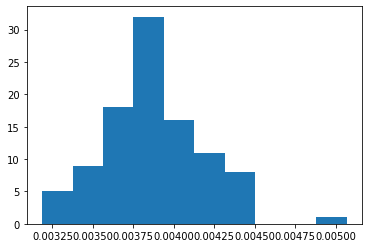

In [197]:
plt.hist(median_list)
plt.show

In [198]:
print(np.mean(np.array(median_list)))
print(np.std(np.array(median_list)))

0.0038777536180705226
0.000306222332269605


<function matplotlib.pyplot.show(*args, **kw)>

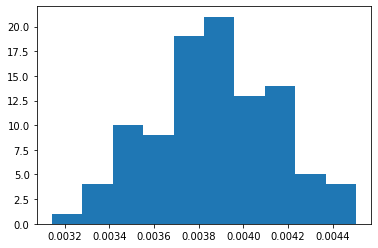

In [173]:
plt.hist(median_list)
plt.show

In [174]:
print(np.mean(np.array(median_list)))
print(np.std(np.array(median_list)))

0.0038752488190550716
0.0002726632966469613


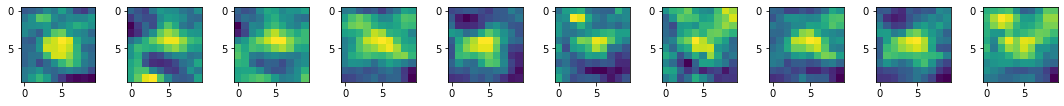

In [112]:
fig, ax = plt.subplots(1,10,figsize=(15,1.5))
#ax.imshow(cutout_list[0])
ax[0].imshow(boot_arr[0])
ax[1].imshow(boot_arr[1])
ax[2].imshow(boot_arr[2])
ax[3].imshow(boot_arr[3])
ax[4].imshow(boot_arr[4])
ax[5].imshow(boot_arr[5])
ax[6].imshow(boot_arr[6])
ax[7].imshow(boot_arr[7])
ax[8].imshow(boot_arr[8])
ax[9].imshow(boot_arr[9])
plt.tight_layout()

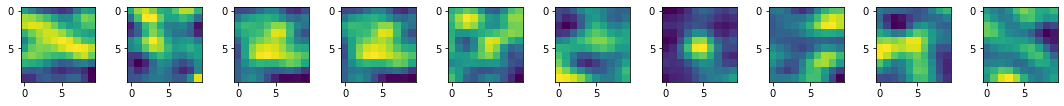

In [70]:
fig, ax = plt.subplots(1,10,figsize=(15,1.5))
#ax.imshow(cutout_list[0])
ax[0].imshow(cutout_list[0])
ax[1].imshow(cutout_list[1])
ax[2].imshow(cutout_list[2])
ax[3].imshow(cutout_list[3])
ax[4].imshow(cutout_list[4])
ax[5].imshow(cutout_list[5])
ax[6].imshow(cutout_list[6])
ax[7].imshow(cutout_list[7])
ax[8].imshow(cutout_list[8])
ax[9].imshow(cutout_list[9])
plt.tight_layout()

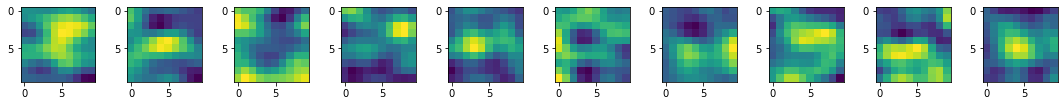

In [81]:
fig, ax = plt.subplots(1,10,figsize=(15,1.5))
#ax.imshow(cutout_list[0])
ax[0].imshow(cutout_list[0])
ax[1].imshow(cutout_list[1])
ax[2].imshow(cutout_list[2])
ax[3].imshow(cutout_list[3])
ax[4].imshow(cutout_list[4])
ax[5].imshow(cutout_list[5])
ax[6].imshow(cutout_list[6])
ax[7].imshow(cutout_list[7])
ax[8].imshow(cutout_list[8])
ax[9].imshow(cutout_list[9])
plt.tight_layout()

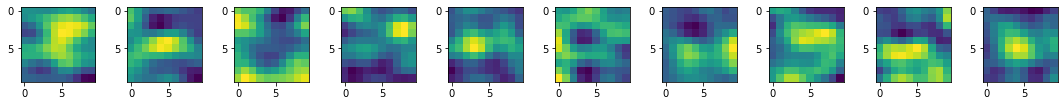

In [92]:
fig, ax = plt.subplots(1,10,figsize=(15,1.5))
#ax.imshow(cutout_list[0])
ax[0].imshow(cutout_list[0])
ax[1].imshow(cutout_list[1])
ax[2].imshow(cutout_list[2])
ax[3].imshow(cutout_list[3])
ax[4].imshow(cutout_list[4])
ax[5].imshow(cutout_list[5])
ax[6].imshow(cutout_list[6])
ax[7].imshow(cutout_list[7])
ax[8].imshow(cutout_list[8])
ax[9].imshow(cutout_list[9])
plt.tight_layout()

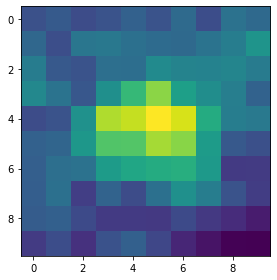

In [66]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(np.median(arr,axis=0))
plt.tight_layout()

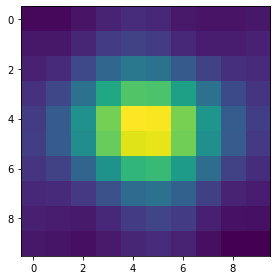

In [84]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(np.median(arr,axis=0))
plt.tight_layout()

In [88]:
upper= np.max(np.median(arr,axis=0))

In [89]:
lower= np.min(np.median(arr,axis=0))

In [168]:
aperture = CircularAperture((6./pixscale_lofar+0.5,6./pixscale_lofar+0.5),r=6./pixscale_lofar)
phot_table = aperture_photometry(np.median(arr,axis=0), aperture)
print(phot_table['aperture_sum'])

     aperture_sum    
---------------------
0.0038250026024538395


In [196]:
boot_arr = bootstrap(np.arange(len(arr))).astype(int)
print(len(boot_arr))
print(boot_arr)

median_list=[]
for n in boot_arr:
    stack = arr[n]
    stack = np.median(stack,axis=0)
    aperture = CircularAperture((6./pixscale_lofar+0.5,6./pixscale_lofar+0.5),r=6./pixscale_lofar)
    phot_table = aperture_photometry(stack, aperture)
    median_list.append(phot_table['aperture_sum'][0])
median_list

100
[[205  56 157 ... 126  36 112]
 [  1 173  43 ... 200  40 214]
 [ 83 190 189 ... 157  78  76]
 ...
 [200 126 168 ...  74 114  74]
 [216  75 170 ... 221 215 220]
 [ 16  70 133 ... 126 200 128]]


[0.0036931181297532503,
 0.00331310044453206,
 0.0043133049280180595,
 0.0037587682611661694,
 0.004124316221882935,
 0.004155316015202539,
 0.0038307282451384727,
 0.0037782748800244082,
 0.003554787981585451,
 0.003682608741114573,
 0.004220063581237378,
 0.004058471783907201,
 0.0035116239730837518,
 0.004021335463575703,
 0.003767265073232176,
 0.004000647768654124,
 0.003959983312640173,
 0.0038893039975583417,
 0.0031869289954054294,
 0.003882354427852351,
 0.0037059579562674586,
 0.003826656366465885,
 0.0050671688327618555,
 0.003913147670229331,
 0.003785217240297954,
 0.003913221378657868,
 0.004306738014198607,
 0.0036614466829361083,
 0.004436906791045785,
 0.00433221765676802,
 0.004360396632274649,
 0.003484482579136457,
 0.0036186932149736635,
 0.0041390052822450445,
 0.0037952638244064525,
 0.0038591653842556433,
 0.003620332402424018,
 0.003693092276537135,
 0.004158653189676231,
 0.0032961139582011983,
 0.004468955613398447,
 0.0037495923676663357,
 0.0038937059138948

### Get fluxes from stacked cutouts and write them on a table

In [51]:
def get_flux(group_name,image_data,W,pixscale,FWHM,unit):
    ''' Create cutouts of the sources listed in group_name, taken from the map in image_data using
        the world coordinate system W. Stack images to get the median value in each pixel. Extract
        the flux from stack performing aperture photometry with a radius equal to FWHM, converted 
        from arcsec into pixels with pixscale.
        Returns flux in mJy
    '''
    cutout_list=[]
    for ra,dec in zip(grouped_1.get_group(group_name).loc[:,'RA'],grouped_1.get_group(group_name).loc[:,'DEC']):
        world_coords = [ra,dec]
        pixel_coords = W.all_world2pix([world_coords], 0)
        position = (pixel_coords[0][0],pixel_coords[0][1])
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2) # twice the fwhm plus 2 pixels
        cutout = Cutout2D(image_data, position, size,mode='partial') # no trimming of cutouts
        cutout_list.append(cutout.data)
        
    print(np.array(cutout_list).shape)
    try:
        median = np.median(np.array(cutout_list),axis=0)
    except:
        print(np.shape(np.array(cutout_list)))
        print(np.array(cutout_list))
                                # aperture center position in pixel coordinates
    aperture = CircularAperture((FWHM/pixscale+0.5,FWHM/pixscale+0.5),r=FWHM/pixscale)
    phot_table = aperture_photometry(median, aperture)
    if unit=='Jy/pix':
        median_flux = phot_table['aperture_sum'][0]
    elif unit=='Jy/beam':
        pixarea = pixscale**2 # pixel area in arcsec^2/pixel
        beamarea = np.pi*((FWHM**2)/(4*np.log(2))) # beam area in arcsec^2/beam
        median_flux = phot_table['aperture_sum'][0]*pixarea/beamarea # converting to Jy/pixel
    
    return median_flux*1000 # from Jy to mJy

In [52]:
# Create table with fluxes
results_table = pd.DataFrame({})
for name in grouped_1.groups.keys():
    
    flux_lofar = get_flux(name,imdata_lofar,w_lofar,pixscale_lofar,FWHM=6.0,unit='Jy/beam')    
    flux_100 = get_flux(name,imdata_100,w_100,pixscale_100,FWHM=6.8,unit='Jy/pix')
    flux_160 = get_flux(name,imdata_160,w_160,pixscale_160,FWHM=11.0,unit='Jy/pix')
    flux_250 = get_flux(name,imdata_250,w_250,pixscale_250,FWHM=18.2,unit='Jy/beam')
    flux_350 = get_flux(name,imdata_350,w_350,pixscale_350,FWHM=24.9,unit='Jy/beam')
    flux_500 = get_flux(name,imdata_500,w_500,pixscale_500,FWHM=36.3,unit='Jy/beam')
        
    results_table = results_table.append(pd.DataFrame({"Type":[name[0]],
                                                        "Mass_range":[f'{name[1]} - {name[1]+0.5}'],
                                                        "Median_mass":[grouped_1.get_group(name).median()['Mass_median']],
                                                        "Count":[len(grouped_1.get_group(name))],
                                                        "LOFAR_flux(mJy)":[flux_lofar],
                                                        "100_flux(mJy)":[flux_100],
                                                        "160_flux(mJy)":[flux_160],
                                                        "250_flux(mJy)":[flux_250],
                                                        "350_flux(mJy)":[flux_350],
                                                        "500_flux(mJy)":[flux_500]}),ignore_index=True)

(6, 10, 10)
(6, 9, 9)
(6, 9, 9)
(6, 8, 8)
(6, 8, 8)
(6, 8, 8)
(69, 10, 10)
(69, 9, 9)
(69, 9, 9)
(69, 8, 8)
(69, 8, 8)
(69, 8, 8)
(165, 10, 10)
(165, 9, 9)
(165, 9, 9)
(165, 8, 8)
(165, 8, 8)
(165, 8, 8)
(454, 10, 10)
(454, 9, 9)
(454, 9, 9)
(454, 8, 8)
(454, 8, 8)
(454, 8, 8)
(1553, 10, 10)
(1553, 9, 9)
(1553, 9, 9)
(1553, 8, 8)
(1553, 8, 8)
(1553, 8, 8)
(1959, 10, 10)
(1959, 9, 9)
(1959, 9, 9)
(1959, 8, 8)
(1959, 8, 8)
(1959, 8, 8)
(696, 10, 10)
(696, 9, 9)
(696, 9, 9)
(696, 8, 8)
(696, 8, 8)
(696, 8, 8)
(32, 10, 10)
(32, 9, 9)
(32, 9, 9)
(32, 8, 8)
(32, 8, 8)
(32, 8, 8)
(35, 10, 10)
(35, 9, 9)
(35, 9, 9)
(35, 8, 8)
(35, 8, 8)
(35, 8, 8)
(138, 10, 10)
(138, 9, 9)
(138, 9, 9)
(138, 8, 8)
(138, 8, 8)
(138, 8, 8)
(1367, 10, 10)
(1367, 9, 9)
(1367, 9, 9)
(1367, 8, 8)
(1367, 8, 8)
(1367, 8, 8)
(5306, 10, 10)
(5306, 9, 9)
(5306, 9, 9)
(5306, 8, 8)
(5306, 8, 8)
(5306, 8, 8)
(6099, 10, 10)
(6099, 9, 9)
(6099, 9, 9)
(6099, 8, 8)
(6099, 8, 8)
(6099, 8, 8)
(5969, 10, 10)
(5969, 9, 9)
(5969, 9, 

### Get fluxes from stacked cutouts and their uncertainties from bootstrap samples, and write them on a table

In [123]:
def get_flux_and_unc(group_name,image_data,W,pixscale,FWHM,unit):
    ''' Create cutouts of the sources listed in group_name, taken from the map in image_data using
        the world coordinate system W. Stack images to get the median value in each pixel. Extract
        the flux from stack performing aperture photometry with a radius equal to FWHM, converted 
        from arcsec into pixels with pixscale.
        Returns flux in mJy
    '''
    cutout_list=[]
    for ra,dec in zip(grouped_2.get_group(group_name).loc[:,'RA'],grouped_2.get_group(group_name).loc[:,'DEC']):
        world_coords = [ra,dec]
        pixel_coords = W.all_world2pix([world_coords], 0)
        position = (pixel_coords[0][0],pixel_coords[0][1])
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2) # twice the fwhm plus 2 pixels
        cutout = Cutout2D(image_data, position, size,mode='partial') # no trimming of cutouts
        cutout_list.append(cutout.data)
    
    cutout_arr = np.array(cutout_list)
    print(cutout_arr.shape)
    boot_arr = bootstrap(np.arange(len(cutout_arr)),bootnum=500).astype(int)
    print(boot_arr.shape)

    median_list=[]
    for n in boot_arr:
        stack = cutout_arr[n]
        stack = np.median(stack,axis=0)
                                    # aperture center position in pixel coordinates
        aperture = CircularAperture((FWHM/pixscale+0.5,FWHM/pixscale+0.5),r=FWHM/pixscale)
        phot_table = aperture_photometry(stack, aperture)
        median_list.append(phot_table['aperture_sum'][0])    
        
    if unit=='Jy/pix':
        median_flux = np.mean(median_list)
        std_flux = np.std(median_list)        
    elif unit=='Jy/beam':
        pixarea = pixscale**2 # pixel area in arcsec^2/pixel
        beamarea = np.pi*((FWHM**2)/(4*np.log(2))) # beam area in arcsec^2/beam
        median_flux = np.mean(median_list)*pixarea/beamarea # converting to Jy/pixel
        std_flux = np.std(median_list)*pixarea/beamarea
    
    return median_flux*1000, std_flux*1000 # from Jy to mJy

In [31]:
def get_flux_and_unc(group_name,image_data,W,pixscale,FWHM,unit):
    ''' Create cutouts of the sources listed in group_name, taken from the map in image_data using
        the world coordinate system W. Stack images to get the median value in each pixel. Extract
        the flux from stack performing aperture photometry with a radius equal to FWHM, converted 
        from arcsec into pixels with pixscale.
        Returns flux in mJy
    '''
    cutout_list=[]
    for ra,dec in zip(grouped_1.get_group(group_name).loc[:,'RA'],grouped_1.get_group(group_name).loc[:,'DEC']):
        world_coords = [ra,dec]
        pixel_coords = W.all_world2pix([world_coords], 0)
        position = (pixel_coords[0][0],pixel_coords[0][1])
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2) # twice the fwhm plus 2 pixels
        cutout = Cutout2D(image_data, position, size,mode='partial') # no trimming of cutouts
        cutout_list.append(cutout.data)
    
    cutout_list = np.array(cutout_list)
    #print(cutout_list.shape)
    boot_arr = bootstrap(np.arange(len(cutout_list)),bootnum=100).astype(int)
    #print(boot_arr.shape)

    median_list=[]
    for n in boot_arr:
        stack = cutout_list[n]
        stack = np.median(stack,axis=0)
                                    # aperture center position in pixel coordinates
        aperture = CircularAperture((FWHM/pixscale+0.5,FWHM/pixscale+0.5),r=FWHM/pixscale)
        phot_table = aperture_photometry(stack, aperture)
        median_list.append(phot_table['aperture_sum'][0])    
        
    if unit=='Jy/pix':
        median_flux = np.mean(median_list)
        std_flux = np.std(median_list)        
    elif unit=='Jy/beam':
        pixarea = pixscale**2 # pixel area in arcsec^2/pixel
        beamarea = np.pi*((FWHM**2)/(4*np.log(2))) # beam area in arcsec^2/beam
        median_flux = np.mean(median_list)*pixarea/beamarea # converting to Jy/pixel
        std_flux = np.std(median_list)*pixarea/beamarea
    print(group_name)
    
    return median_flux*1000, std_flux*1000 # from Jy to mJy

In [32]:
grouped_1.size()

       Mass_median_2  z  
IRBQG  10.05          0.5    1
       10.20          1.0    3
       10.35          0.5    1
                      1.0    2
       10.50          0.5    2
                            ..
SFG    11.70          0.5    2
       11.85          0.0    1
                      1.0    1
       12.15          1.0    2
       12.30          1.0    1
Length: 137, dtype: int64

In [33]:
# Create table with fluxes and their uncertainties
time_start = time()
results_table_1 = pd.DataFrame({})
for name in grouped_1.groups.keys():
    
    flux_lofar,std_lofar = get_flux_and_unc(name,imdata_lofar,w_lofar,pixscale_lofar,FWHM=6.0,unit='Jy/beam')    
    flux_100,std_100 = get_flux_and_unc(name,imdata_100,w_100,pixscale_100,FWHM=6.8,unit='Jy/pix')
    flux_160,std_160 = get_flux_and_unc(name,imdata_160,w_160,pixscale_160,FWHM=11.0,unit='Jy/pix')
    flux_250,std_250 = get_flux_and_unc(name,imdata_250,w_250,pixscale_250,FWHM=18.2,unit='Jy/beam')
    flux_350,std_350 = get_flux_and_unc(name,imdata_350,w_350,pixscale_350,FWHM=24.9,unit='Jy/beam')
    flux_500,std_500 = get_flux_and_unc(name,imdata_500,w_500,pixscale_500,FWHM=36.3,unit='Jy/beam')
        
    results_table_1 = results_table_1.append(pd.DataFrame({"Type":[name[0]],
                                                           "Mass_range":[f'{name[1]} - {name[1]+binwidth}'],
                                                           "Median_mass":[grouped_1.get_group(name).median()['Mass_median_2']],
                                                           "Redshift_range":[f'{name[2]} - {name[2]+0.5}'],
                                                           "Median_redshift":[grouped_1.get_group(name).median()['z']],
                                                           "Count":[len(grouped_1.get_group(name))],#}),ignore_index=True)
                                                           "LOFAR_flux(mJy)":[flux_lofar],
                                                           "LOFAR_std(mJy)":[std_lofar],
                                                           "100_flux(mJy)":[flux_100],
                                                           "100_std(mJy)":[std_100],
                                                           "160_flux(mJy)":[flux_160],
                                                           "160_std(mJy)":[std_100],
                                                           "250_flux(mJy)":[flux_250],
                                                           "250_std(mJy)":[std_100],
                                                           "350_flux(mJy)":[flux_350],
                                                           "350_std(mJy)":[std_100],
                                                           "500_flux(mJy)":[flux_500],
                                                           "500_std(mJy)":[std_100]}),ignore_index=True)
time_end = time()
print()
print(time_end-time_start)

('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.799

('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.5499999999

('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 1.0)
('SFG', 11.85, 1.0)
('SFG',

In [42]:
# Create table with fluxes and their uncertainties
time_start = time()
results_table_1 = pd.DataFrame({})
for name in grouped_1.groups.keys():
        
    results_table_1 = results_table_1.append(pd.DataFrame({"Type":[name[0]],
                                                           "Mass_range":[f'{name[1]} - {name[1]+binwidth}'],
                                                           "Median_mass":[grouped_1.get_group(name).median()['Mass_median_2']],
                                                           "Redshift_range":[f'{name[2]} - {name[2]+0.5}'],
                                                           "Median_redshift":[grouped_1.get_group(name).median()['z']],
                                                           "Count":[len(grouped_1.get_group(name))],
                                                           "IR_detected":[grouped_1.get_group(name).count().loc['F_PACS_100']],
                                                           "Radio_detected":[grouped_1.get_group(name).count().loc['S_Code']]}),ignore_index=True)
time_end = time()
print()
print(time_end-time_start)

/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)



8.475915908813477


In [45]:
results_table_1[results_table_1['Type']=='QG']

Type    Mass_range  Median_mass Redshift_range  Median_redshift  Count  \
18   QG    9.0 - 9.15     9.072879      0.0 - 0.5          0.23230   2571   
19   QG    9.0 - 9.15     9.089611      0.5 - 1.0          0.59615    174   
20   QG    9.0 - 9.15     9.087768      1.0 - 1.5          1.19430     11   
21   QG    9.15 - 9.3     9.222055      0.0 - 0.5          0.23610   2380   
22   QG    9.15 - 9.3     9.232974      0.5 - 1.0          0.60160    243   
..  ...           ...          ...            ...              ...    ...   
74   QG  11.7 - 11.85    11.768374      1.0 - 1.5          1.38245      4   
75   QG  11.85 - 12.0    11.926410      0.0 - 0.5          0.26955      4   
76   QG  11.85 - 12.0    11.876110      0.5 - 1.0          0.55220      1   
77   QG  12.0 - 12.15    12.066872      0.0 - 0.5          0.37860      1   
78   QG  12.15 - 12.3    12.205575      0.5 - 1.0          0.62870      1   

    IR_detected  Radio_detected  
18          345               0  
19           17               0  
20            2               0  
21          371               0  
22           26               0  
..          ...             ...  
74            3               0  
75            4               0  
76            1               0  
77            0               0  
78            0               0  

[61 rows x 8 columns]

In [43]:
results_table_1.sum()

Type               IRBQGIRBQGIRBQGIRBQGIRBQGIRBQGIRBQGIRBQGIRBQGI...
Mass_range         10.049999999999999 - 10.210.2 - 10.3510.35 - 1...
Median_mass                                                  1445.82
Redshift_range     0.5 - 1.01.0 - 1.50.5 - 1.01.0 - 1.50.5 - 1.01...
Median_redshift                                              112.768
Count                                                         387581
IR_detected                                                   177743
Radio_detected                                                  7209
dtype: object

In [88]:
results_table_1

Type   Mass_range  Median_mass  Count  LOFAR_flux(mJy)  LOFAR_std(mJy)  \
0    QG    8.0 - 8.5     8.298146      6        -0.010194        0.035734   
1    QG    8.5 - 9.0     8.847066     69         0.004709        0.010106   
2    QG    9.0 - 9.5     9.282404    165         0.000714        0.007158   
3    QG   9.5 - 10.0     9.857409    454         0.009039        0.004028   
4    QG  10.0 - 10.5    10.286428   1553         0.018064        0.002191   
5    QG  10.5 - 11.0    10.736360   1959         0.021388        0.002260   
6    QG  11.0 - 11.5    11.143562    696         0.080329        0.005637   
7    QG  11.5 - 12.0    11.604734     32         0.255844        0.050966   
8   SFG    7.0 - 7.5     7.347608     35         0.008189        0.016270   
9   SFG    7.5 - 8.0     7.829619    138         0.004970        0.007678   
10  SFG    8.0 - 8.5     8.379069   1367        -0.002930        0.002269   
11  SFG    8.5 - 9.0     8.766967   5306         0.002866        0.001176   
12  SFG    9.0 - 9.5     9.267151   6099         0.016097        0.001049   
13  SFG   9.5 - 10.0     9.735712   5969         0.028325        0.001139   
14  SFG  10.0 - 10.5    10.222625   4100         0.063689        0.001565   
15  SFG  10.5 - 11.0    10.675832   1925         0.119696        0.003242   
16  SFG  11.0 - 11.5    11.086555    229         0.212167        0.016289   
17  SFG  11.5 - 12.0    11.562853      5         0.150446        0.305647   

    100_flux(mJy)  100_std(mJy)  160_flux(mJy)  160_std(mJy)  250_flux(mJy)  \
0        2.586846      4.587284      -8.781093      4.587284      -2.829593   
1       -0.190909      1.146867       2.393843      1.146867      -3.019977   
2        0.167033      1.008490       2.282045      1.008490      -2.442838   
3       -0.561699      0.515735      -1.766767      0.515735      -1.757582   
4        0.039514      0.291565       1.218774      0.291565      -1.607129   
5        0.067381      0.274995       1.605872      0.274995      -1.147927   
6        0.872754      0.437448       2.570056      0.437448       1.236992   
7        1.597232      2.022864       6.945698      2.022864       6.206528   
8        2.657251      2.404379       1.154487      2.404379      -2.774269   
9        1.253232      0.934723      -3.703522      0.934723      -3.554169   
10      -0.178353      0.321076      -0.024558      0.321076      -3.423090   
11      -0.264163      0.151668       0.079326      0.151668      -3.009858   
12       0.252779      0.138316       0.457110      0.138316      -1.562682   
13       0.296299      0.153375       1.146244      0.153375      -0.930395   
14       1.484618      0.186824       3.763941      0.186824       1.604092   
15       2.870272      0.276445       5.854686      0.276445       5.567805   
16       4.955656      0.933985      11.430556      0.933985      13.131138   
17       2.935948      5.882315      18.214174      5.882315      -0.431642   

    250_std(mJy)  350_flux(mJy)  350_std(mJy)  500_flux(mJy)  500_std(mJy)  
0       4.587284       0.549258      4.587284       2.224789      4.587284  
1       1.146867      -2.905001      1.146867      -1.916254      1.146867  
2       1.008490      -2.204575      1.008490      -2.383686      1.008490  
3       0.515735      -1.991074      0.515735      -1.187472      0.515735  
4       0.291565      -1.998231      0.291565      -1.369535      0.291565  
5       0.274995      -2.068301      0.274995      -1.979860      0.274995  
6       0.437448       0.055999      0.437448      -0.699658      0.437448  
7       2.022864       2.445879      2.022864       1.077253      2.022864  
8       2.404379      -1.354707      2.404379      -0.819618      2.404379  
9       0.934723      -4.419582      0.934723      -4.512630      0.934723  
10      0.321076      -3.857953      0.321076      -3.046511      0.321076  
11      0.151668      -3.266312      0.151668      -2.451795      0.151668  
12      0.138316      -1.922312     

In [58]:
results_table_1.to_csv(path+'Bootes/Bootes_full_results_NDWFS_2.csv',index=False)

In [34]:
results_table_1.to_csv(path+'Bootes/Bootes_full_results_NDWFS_3.csv',index=False)

In [46]:
results_table_1.to_csv(path+'Bootes/Bootes_full_detected_count.csv',index=False)

In [89]:
#results_table_1.to_csv(path+'Bootes/Bootes_z055_results_NDWFS.csv',index=False)

In [127]:
#results_table_2.to_csv(path+'Bootes/Bootes_z055_results_HerMES.csv',index=False)

In [59]:
results_table=pd.read_csv(path+'Bootes/Bootes_full_results_NDWFS_2.csv')

In [155]:
results_table_1['Count'].sum()

525493

In [35]:
results_table_1['Count'].sum()

387581

In [164]:
numbers = bootes_1.index.to_frame(name='numbers')

In [168]:
numbers.to_csv(path+'Bootes/Bootes_selected_indexes.csv',index=False)

In [60]:
results_table

Type                               Mass_range  Median_mass  \
0   IRBQG                               9.9 - 10.4    10.188737   
1   IRBQG                              10.2 - 10.7    10.434191   
2   IRBQG                              10.2 - 10.7    10.289956   
3   IRBQG                              10.5 - 11.0    10.551246   
4   IRBQG                              10.5 - 11.0    10.690874   
..    ...                                      ...          ...   
71    SFG                              11.7 - 12.2    11.909817   
72    SFG                              11.7 - 12.2    11.735640   
73    SFG                              11.7 - 12.2    11.976331   
74    SFG                              12.0 - 12.5    12.235741   
75    SFG  12.299999999999999 - 12.799999999999999    12.339969   

   Redshift_range  Median_redshift  Count  LOFAR_flux(mJy)  LOFAR_std(mJy)  \
0       0.5 - 1.0          0.73290      1         1.852234    3.827418e-16   
1       0.5 - 1.0          0.70760      1         0.702044    1.913709e-16   
2       1.0 - 1.5          1.42520      5         0.043691    5.335709e-02   
3       0.5 - 1.0          0.83860      2         0.041980    6.070640e-02   
4       1.0 - 1.5          1.43720     26         0.070858    1.835444e-02   
..            ...              ...    ...              ...             ...   
71      0.0 - 0.5          0.40550      1         0.081672    1.196068e-17   
72      0.5 - 1.0          0.67935      2        -0.005447    4.132612e-02   
73      1.0 - 1.5          1.34960      1        -0.160029    4.784272e-17   
74      1.0 - 1.5          1.42760      2        -0.048626    2.108978e-02   
75      1.0 - 1.5          1.46550      1        -0.071986    1.196068e-17   

    100_flux(mJy)  100_std(mJy)  160_flux(mJy)  160_std(mJy)  250_flux(mJy)  \
0       -8.015293  0.000000e+00      26.635364  0.000000e+00      10.445602   
1       -4.270449  8.673617e-16      -8.021799  8.673617e-16      -0.493414   
2        4.001256  8.333744e+00      10.797136  8.333744e+00      13.993947   
3       11.881541  6.493317e+00      26.328942  6.493317e+00       6.674760   
4       -0.538877  1.606186e+00      -0.214197  1.606186e+00      10.252271   
..            ...           ...            ...           ...            ...   
71      -3.662153  2.168404e-15       0.265135  2.168404e-15      13.082060   
72       8.119149  4.968157e+00      39.244968  4.968157e+00      -3.555826   
73      11.325651  1.734723e-15     -33.259291  1.734723e-15       0.688749   
74      -8.485049  6.249148e+00     -30.956032  6.249148e+00      -7.303769   
75       5.751839  0.000000e+00       2.844235  0.000000e+00     -14.537030   

    250_std(mJy)  350_flux(mJy)  350_std(mJy)  500_flux(mJy)  500_std(mJy)  
0   0.000000e+00      13.149477  0.000000e+00       6.266338  0.000000e+00  
1   8.673617e-16      -6.957074  8.673617e-16     -10.630174  8.673617e-16  
2   8.333744e+00      17.713338  8.333744e+00      16.321345  8.333744e+00  
3   6.493317e+00       4.657165  6.493317e+00       2.932341  6.493317e+00  
4   1.606186e+00       9.508502  1.606186e+00       6.646002  1.606186e+00  
..           ...            ...           ...            ...           ...  
71  2.168404e-15       2.107945  2.168404e-15     -10.032671  2.168404e-15  
72  4.968157e+00      -4.548179  4.968157e+00       2.896992  4.968157e+00  
73  1.734723e-15       1.711294  1.734723e-15      -0.433279  1.734723e-15  
74  6.249148e+00      -3.863328  6.249148e+00     -11.705443  6.249148e+00  
75  0.000000e+00     -18.000300  0.000000e+00     -15.587393  0.000000e+00  

[76 rows x 18 columns]

In [78]:
results_table

Type   Mass_range  Median_mass  Count  LOFAR_flux(mJy)  100_flux(mJy)  \
0    QG    8.0 - 8.5     8.298146      6        -0.007712       2.310275   
1    QG    8.5 - 9.0     8.847066     69         0.004302      -0.424882   
2    QG    9.0 - 9.5     9.282404    165         0.000861       0.175775   
3    QG   9.5 - 10.0     9.857409    454         0.009221      -0.523248   
4    QG  10.0 - 10.5    10.286428   1553         0.018171       0.009221   
5    QG  10.5 - 11.0    10.736360   1959         0.021266       0.106133   
6    QG  11.0 - 11.5    11.143562    696         0.080139       0.877878   
7    QG  11.5 - 12.0    11.604734     32         0.247403       1.701081   
8   SFG    7.0 - 7.5     7.347608     35         0.009568       3.007243   
9   SFG    7.5 - 8.0     7.829619    138         0.004316       1.474777   
10  SFG    8.0 - 8.5     8.379069   1367        -0.002906      -0.171383   
11  SFG    8.5 - 9.0     8.766967   5306         0.002945      -0.282366   
12  SFG    9.0 - 9.5     9.267151   6099         0.016035       0.261831   
13  SFG   9.5 - 10.0     9.735712   5969         0.028333       0.294340   
14  SFG  10.0 - 10.5    10.222625   4100         0.063618       1.493177   
15  SFG  10.5 - 11.0    10.675832   1925         0.119739       2.885426   
16  SFG  11.0 - 11.5    11.086555    229         0.210983       5.095576   
17  SFG  11.5 - 12.0    11.562853      5         0.062119       1.811355   

    160_flux(mJy)  250_flux(mJy)  350_flux(mJy)  500_flux(mJy)  
0       -8.540653      -4.261826       0.017207       2.411184  
1        2.503080      -3.270402      -2.910707      -2.133431  
2        2.362119      -2.502615      -2.288538      -2.395287  
3       -1.810264      -1.764615      -2.050395      -1.206281  
4        1.179925      -1.590474      -2.021465      -1.399587  
5        1.605122      -1.173178      -2.045325      -1.988647  
6        2.510049       1.204770       0.043360      -0.745827  
7        6.712592       6.166786       2.396500       0.903910  
8        0.950225      -2.753453      -1.814727      -1.464155  
9       -3.736504      -3.458950      -4.499573      -4.600049  
10       0.015586      -3.444534      -3.842537      -3.027239  
11       0.072871      -3.011363      -3.275896      -2.471523  
12       0.440407      -1.561198      -1.923244      -1.548006  
13       1.144347      -0.935243      -1.939536      -1.784656  
14       3.725520       1.616660      -0.341430      -1.284132  
15       5.889906       5.548671       1.990148      -0.043141  
16      11.471519      12.990200       8.324597       4.002375  
17      17.293215      -1.305230      -4.789099       2.752697

log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msol/year]) + 0.33*log10(M[10^10Msol]) + 22.22
    ???              = 0.9*log10(100)  + 0.33*log10(10) + 22.22

### CHECK L150-SFR RELATION BY CALISTRO-RIVERA
https://arxiv.org/pdf/1704.06268.pdf

In [99]:
10**(0.9*2+0.33*1+22.22)

2.2387211385683286e+24

In [205]:
# Luminosity in W/Hz
results_table['L150MHZ'] = (10**-29)*results_table['LOFAR_flux(mJy)']*4*np.pi*(cosmo.luminosity_distance(0.55).to(u.meter).value)**2

In [80]:
results_table

Type   Mass_range  Median_mass  Count  LOFAR_flux(mJy)  100_flux(mJy)  \
0    QG    8.0 - 8.5     8.298146      6        -0.007712       2.310275   
1    QG    8.5 - 9.0     8.847066     69         0.004302      -0.424882   
2    QG    9.0 - 9.5     9.282404    165         0.000861       0.175775   
3    QG   9.5 - 10.0     9.857409    454         0.009221      -0.523248   
4    QG  10.0 - 10.5    10.286428   1553         0.018171       0.009221   
5    QG  10.5 - 11.0    10.736360   1959         0.021266       0.106133   
6    QG  11.0 - 11.5    11.143562    696         0.080139       0.877878   
7    QG  11.5 - 12.0    11.604734     32         0.247403       1.701081   
8   SFG    7.0 - 7.5     7.347608     35         0.009568       3.007243   
9   SFG    7.5 - 8.0     7.829619    138         0.004316       1.474777   
10  SFG    8.0 - 8.5     8.379069   1367        -0.002906      -0.171383   
11  SFG    8.5 - 9.0     8.766967   5306         0.002945      -0.282366   
12  SFG    9.0 - 9.5     9.267151   6099         0.016035       0.261831   
13  SFG   9.5 - 10.0     9.735712   5969         0.028333       0.294340   
14  SFG  10.0 - 10.5    10.222625   4100         0.063618       1.493177   
15  SFG  10.5 - 11.0    10.675832   1925         0.119739       2.885426   
16  SFG  11.0 - 11.5    11.086555    229         0.210983       5.095576   
17  SFG  11.5 - 12.0    11.562853      5         0.062119       1.811355   

    160_flux(mJy)  250_flux(mJy)  350_flux(mJy)  500_flux(mJy)       L150MHZ  
0       -8.540653      -4.261826       0.017207       2.411184 -9.315740e+21  
1        2.503080      -3.270402      -2.910707      -2.133431  5.196415e+21  
2        2.362119      -2.502615      -2.288538      -2.395287  1.040227e+21  
3       -1.810264      -1.764615      -2.050395      -1.206281  1.113762e+22  
4        1.179925      -1.590474      -2.021465      -1.399587  2.194836e+22  
5        1.605122      -1.173178      -2.045325      -1.988647  2.568707e+22  
6        2.510049       1.204770       0.043360      -0.745827  9.679847e+22  
7        6.712592       6.166786       2.396500       0.903910  2.988326e+23  
8        0.950225      -2.753453      -1.814727      -1.464155  1.155743e+22  
9       -3.736504      -3.458950      -4.499573      -4.600049  5.213143e+21  
10       0.015586      -3.444534      -3.842537      -3.027239 -3.509893e+21  
11       0.072871      -3.011363      -3.275896      -2.471523  3.557746e+21  
12       0.440407      -1.561198      -1.923244      -1.548006  1.936803e+22  
13       1.144347      -0.935243      -1.939536      -1.784656  3.422247e+22  
14       3.725520       1.616660      -0.341430      -1.284132  7.684263e+22  
15       5.889906       5.548671       1.990148      -0.043141  1.446302e+23  
16      11.471519      12.990200       8.324597       4.002375  2.548415e+23  
17      17.293215      -1.305230      -4.789099       2.752697  7.503168e+22

In [77]:
def SFR_lofar(L150,M):
    ''' Get the SFR from 150 MHz luminosity and stellar mass, according to the
        mass-dependant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msun/year]) + 0.33*log10(M[10^10Msun]) + 22.22
    '''
    #log10(L150) = 0.9*log10(SFR) + 0.33*(M-10) + 22.22
    log10SFR = (np.log10(L150) - 0.33*(M-10) - 22.22)/0.9
    return 10**log10SFR

In [78]:
SFR_lofar_v = np.vectorize(SFR_lofar)

In [79]:
# Mass-dependant SFR
results_table['SFR_lofar'] = SFR_lofar_v(results_table['L150MHZ'],results_table['Median_mass'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


In [206]:
def SFR_lofar(L150):
    ''' Get the SFR from 150 MHz luminosity, according to the
        mass-independant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 1.058*log10(SFR[Msun/year]) + 22.221
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''
    #log10(L150) = 1.058*log10(SFR) + 22.221
    log10SFR = (np.log10(L150) - 22.221)/1.058
    return 10**log10SFR

In [207]:
# Mass-independant SFR
results_table['SFR_lofar'] = SFR_lofar(results_table['L150MHZ'])

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [74]:
def SFR_150(L150,z=0.55):
    ''' Get the SFR from 150 MHz luminosity, according to the
        L150-SFR relationship by Calistro-Rivera et al. 2017
        SFR150MHz [Msun/year] = 1.455*10^-24*10^q150(z)* L150 [erg/s],
        with 1.455*10^-24*10^q150(z) = 2.289*10^-24 for z~0.5
        https://arxiv.org/pdf/1704.06268.pdf
    '''
    qz = 1.72*(1+z)**-0.22
    Lerg = L150*10**7*(15*10**7) # from W Hz^-1 to erg s^-1 Hz^-1
    return Lerg*1.455*(10**-24)*(10**qz)

In [75]:
# SFR from Calistro-Rivera et al. 2017
results_table['SFR_150'] = SFR_150(results_table['L150MHZ'])

In [61]:
results_table

Type   Mass_range  Median_mass  Count  LOFAR_flux(mJy)  100_flux(mJy)  \
0    QG    8.0 - 8.5     8.298146      6        -0.007712       2.310275   
1    QG    8.5 - 9.0     8.847066     69         0.004302      -0.424882   
2    QG    9.0 - 9.5     9.282404    165         0.000861       0.175775   
3    QG   9.5 - 10.0     9.857409    454         0.009221      -0.523248   
4    QG  10.0 - 10.5    10.286428   1553         0.018171       0.009221   
5    QG  10.5 - 11.0    10.736360   1959         0.021266       0.106133   
6    QG  11.0 - 11.5    11.143562    696         0.080139       0.877878   
7    QG  11.5 - 12.0    11.604734     32         0.247403       1.701081   
8   SFG    7.0 - 7.5     7.347608     35         0.009568       3.007243   
9   SFG    7.5 - 8.0     7.829619    138         0.004316       1.474777   
10  SFG    8.0 - 8.5     8.379069   1367        -0.002906      -0.171383   
11  SFG    8.5 - 9.0     8.766967   5306         0.002945      -0.282366   
12  SFG    9.0 - 9.5     9.267151   6099         0.016035       0.261831   
13  SFG   9.5 - 10.0     9.735712   5969         0.028333       0.294340   
14  SFG  10.0 - 10.5    10.222625   4100         0.063618       1.493177   
15  SFG  10.5 - 11.0    10.675832   1925         0.119739       2.885426   
16  SFG  11.0 - 11.5    11.086555    229         0.210983       5.095576   
17  SFG  11.5 - 12.0    11.562853      5         0.062119       1.811355   

    160_flux(mJy)  250_flux(mJy)  350_flux(mJy)  500_flux(mJy)       L150MHZ  \
0       -8.540653      -4.261826       0.017207       2.411184 -9.315740e+21   
1        2.503080      -3.270402      -2.910707      -2.133431  5.196415e+21   
2        2.362119      -2.502615      -2.288538      -2.395287  1.040227e+21   
3       -1.810264      -1.764615      -2.050395      -1.206281  1.113762e+22   
4        1.179925      -1.590474      -2.021465      -1.399587  2.194836e+22   
5        1.605122      -1.173178      -2.045325      -1.988647  2.568707e+22   
6        2.510049       1.204770       0.043360      -0.745827  9.679847e+22   
7        6.712592       6.166786       2.396500       0.903910  2.988326e+23   
8        0.950225      -2.753453      -1.814727      -1.464155  1.155743e+22   
9       -3.736504      -3.458950      -4.499573      -4.600049  5.213143e+21   
10       0.015586      -3.444534      -3.842537      -3.027239 -3.509893e+21   
11       0.072871      -3.011363      -3.275896      -2.471523  3.557746e+21   
12       0.440407      -1.561198      -1.923244      -1.548006  1.936803e+22   
13       1.144347      -0.935243      -1.939536      -1.784656  3.422247e+22   
14       3.725520       1.616660      -0.341430      -1.284132  7.684263e+22   
15       5.889906       5.548671       1.990148      -0.043141  1.446302e+23   
16      11.471519      12.990200       8.324597       4.002375  2.548415e+23   
17      17.293215      -1.305230      -4.789099       2.752697  7.503168e+22   

    SFR_lofar       SFR_150  
0         NaN -2.117073e+05  
1    0.332969  1.180925e+05  
2    0.072799  2.363995e+04  
3    0.684452  2.531110e+05  
4    1.299576  4.987932e+05  
5    1.507888  5.837582e+05  
6    5.283699  2.199819e+06  
7   15.334151  6.791199e+06  
8    0.708811  2.626513e+05  
9    0.333982  1.184727e+05  
10        NaN -7.976500e+04  
11   0.232753  8.085250e+04  
12   1.154683  4.401533e+05  
13   1.977587  7.777318e+05  
14   4.247843  1.746307e+06  
15   7.722688  3.286832e+06  
16  13.191471  5.791469e+06  
17   4.153160  1.705152e+06

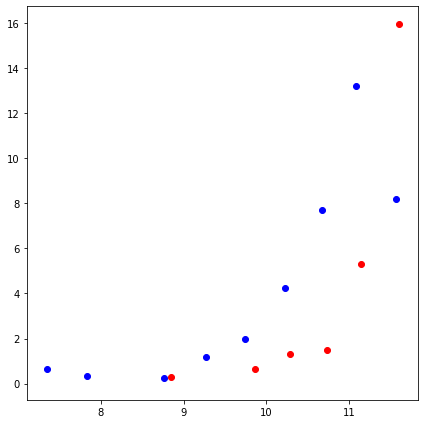

In [208]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],results_table.loc[results_table['Type']=='QG','SFR_lofar'],color='r')
ax.scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],results_table.loc[results_table['Type']=='SFG','SFR_lofar'],color='b')
fig.tight_layout()
plt.show()

In [52]:
## Schreiber+15 Main sequence
m = np.arange(8,12.5,0.5)-9
z = 0.55
r = np.log10(1+z)
logSFR = m - 0.5 + (1.5*r) - 0.3*(np.fmax(m - 0.36-2.5*r,np.zeros(len(m))))**2
## Carnall+20 sSFR quiescent limit
age_factor = np.log10(0.2/cosmo.age(0.55).value)-9

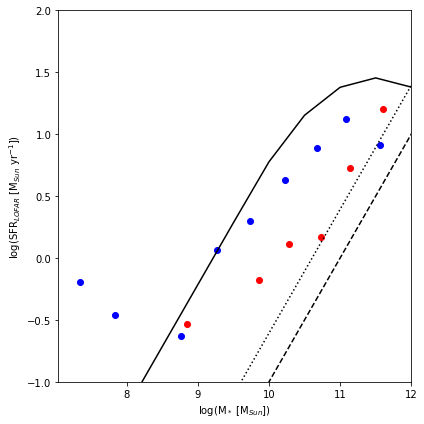

In [210]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(figsize=(6,6))
axs.set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs.set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs.scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar']),
            color='r',label='Quiescent galaxies')
axs.scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar']),
            color='b',label='Star-forming galaxies')
axs.plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs.plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs.plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs.set_ylim(ymin=-1,ymax=2)
axs.set_xlim(xmax=12)

fig.tight_layout()
plt.show()

In [214]:
def SFR_lofar_unc(SFR,L150,flux_unc):
    beta=1.058
    beta_unc=0.007
    logL1=22.221
    logL1_unc=0.008
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(0.55).to(u.meter).value)**2
    unc_squared = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logL1_unc)**2 )*((SFR/beta)**2)
    
    return np.sqrt(unc_squared)

SFR_lofar_unc_v = np.vectorize(SFR_lofar_unc)

In [215]:
results_table['SFR_lofar_unc'] = SFR_lofar_unc_v(results_table['SFR_lofar'],results_table['L150MHZ'],results_table['LOFAR_std(mJy)'])

In [63]:
from scipy.optimize import curve_fit
from scipy.integrate import quad
import astropy.units as u

In [64]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [65]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return np.log10(LIR_LSun)

In [66]:
V_Herschel = np.vectorize(HerschelLIR)

In [67]:
results_table['LIR_H'] = V_Herschel(0.55,results_table['100_flux(mJy)'],results_table['160_flux(mJy)'],results_table['250_flux(mJy)'],results_table['350_flux(mJy)'],results_table['500_flux(mJy)'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


In [68]:
results_table['SFR_H'] = np.power(10,results_table['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

In [76]:
results_table

Type   Mass_range  Median_mass  Count  LOFAR_flux(mJy)  100_flux(mJy)  \
0    QG    8.0 - 8.5     8.298146      6        -0.007712       2.310275   
1    QG    8.5 - 9.0     8.847066     69         0.004302      -0.424882   
2    QG    9.0 - 9.5     9.282404    165         0.000861       0.175775   
3    QG   9.5 - 10.0     9.857409    454         0.009221      -0.523248   
4    QG  10.0 - 10.5    10.286428   1553         0.018171       0.009221   
5    QG  10.5 - 11.0    10.736360   1959         0.021266       0.106133   
6    QG  11.0 - 11.5    11.143562    696         0.080139       0.877878   
7    QG  11.5 - 12.0    11.604734     32         0.247403       1.701081   
8   SFG    7.0 - 7.5     7.347608     35         0.009568       3.007243   
9   SFG    7.5 - 8.0     7.829619    138         0.004316       1.474777   
10  SFG    8.0 - 8.5     8.379069   1367        -0.002906      -0.171383   
11  SFG    8.5 - 9.0     8.766967   5306         0.002945      -0.282366   
12  SFG    9.0 - 9.5     9.267151   6099         0.016035       0.261831   
13  SFG   9.5 - 10.0     9.735712   5969         0.028333       0.294340   
14  SFG  10.0 - 10.5    10.222625   4100         0.063618       1.493177   
15  SFG  10.5 - 11.0    10.675832   1925         0.119739       2.885426   
16  SFG  11.0 - 11.5    11.086555    229         0.210983       5.095576   
17  SFG  11.5 - 12.0    11.562853      5         0.062119       1.811355   

    160_flux(mJy)  250_flux(mJy)  350_flux(mJy)  500_flux(mJy)       L150MHZ  \
0       -8.540653      -4.261826       0.017207       2.411184 -9.315740e+21   
1        2.503080      -3.270402      -2.910707      -2.133431  5.196415e+21   
2        2.362119      -2.502615      -2.288538      -2.395287  1.040227e+21   
3       -1.810264      -1.764615      -2.050395      -1.206281  1.113762e+22   
4        1.179925      -1.590474      -2.021465      -1.399587  2.194836e+22   
5        1.605122      -1.173178      -2.045325      -1.988647  2.568707e+22   
6        2.510049       1.204770       0.043360      -0.745827  9.679847e+22   
7        6.712592       6.166786       2.396500       0.903910  2.988326e+23   
8        0.950225      -2.753453      -1.814727      -1.464155  1.155743e+22   
9       -3.736504      -3.458950      -4.499573      -4.600049  5.213143e+21   
10       0.015586      -3.444534      -3.842537      -3.027239 -3.509893e+21   
11       0.072871      -3.011363      -3.275896      -2.471523  3.557746e+21   
12       0.440407      -1.561198      -1.923244      -1.548006  1.936803e+22   
13       1.144347      -0.935243      -1.939536      -1.784656  3.422247e+22   
14       3.725520       1.616660      -0.341430      -1.284132  7.684263e+22   
15       5.889906       5.548671       1.990148      -0.043141  1.446302e+23   
16      11.471519      12.990200       8.324597       4.002375  2.548415e+23   
17      17.293215      -1.305230      -4.789099       2.752697  7.503168e+22   

    SFR_lofar   SFR_150      LIR_H      SFR_H  
0         NaN -0.032953        NaN        NaN  
1    0.332969  0.018382        NaN        NaN  
2    0.072799  0.003680        NaN        NaN  
3    0.684452  0.039398        NaN        NaN  
4    1.299576  0.077639        NaN        NaN  
5    1.507888  0.090865        NaN        NaN  
6    5.283699  0.342411  10.505250   3.246186  
7   15.334151  1.057080  10.930282   8.637838  
8    0.708811  0.040883        NaN        NaN  
9    0.333982  0.018441        NaN        NaN  
10        NaN -0.012416        NaN        NaN  
11   0.232753  0.012585        NaN        NaN  
12   1.154683  0.068512        NaN        NaN  
13   1.977587  0.121057        NaN        NaN  
14   4.247843  0.271820  10.706031   5.154116  
15   7.722688  0.511610  10.941206   8.857864  
16  13.191471  0.901467  11.223495  16.967523  
17   4.153160  0.265414  11.179873  15.346016

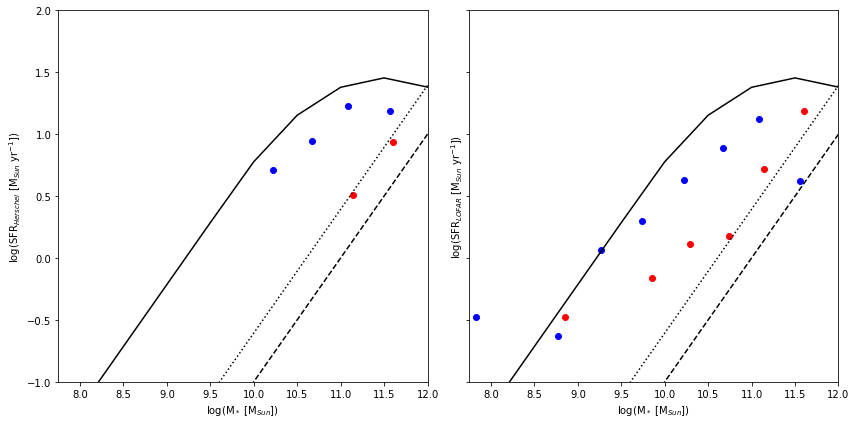

In [70]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,figsize=(12,6),sharex='row',sharey='row')
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_H']),
            color='r',label='Quiescent galaxies')
axs[0].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_H']),
            color='b',label='Star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_ylim(ymin=-1,ymax=2)
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[1].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[1].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar']),
            color='r',label='Quiescent galaxies')
axs[1].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar']),
            color='b',label='Star-forming galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)

fig.tight_layout()
plt.show()

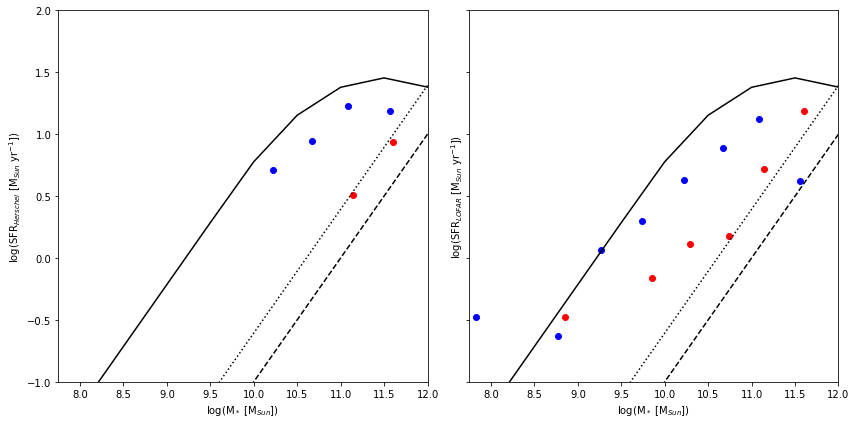

In [97]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,figsize=(12,6),sharex='row',sharey='row')
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_H']),
            color='r',label='Quiescent galaxies')
axs[0].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_H']),
            color='b',label='Star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_ylim(ymin=-1,ymax=2)
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[1].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[1].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar']),
            color='r',label='Quiescent galaxies')
axs[1].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar']),
            color='b',label='Star-forming galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)

fig.tight_layout()
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


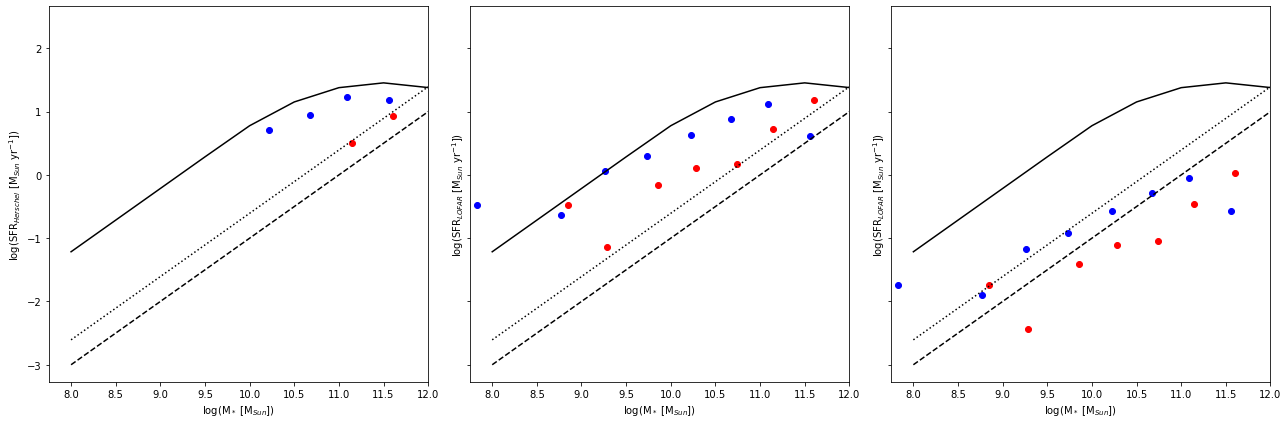

In [77]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6),sharex='row',sharey='row')
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_H']),
            color='r',label='Quiescent galaxies')
axs[0].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_H']),
            color='b',label='Star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[0].set_ylim(ymin=-1,ymax=2)
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[1].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[1].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar']),
            color='r',label='Quiescent galaxies')
axs[1].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar']),
            color='b',label='Star-forming galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)

axs[2].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[2].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[2].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_150']),
            color='r',label='Quiescent galaxies')
axs[2].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_150']),
            color='b',label='Star-forming galaxies')
axs[2].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[2].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[2].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[2].set_xlim(xmax=12)

fig.tight_layout()
plt.show()

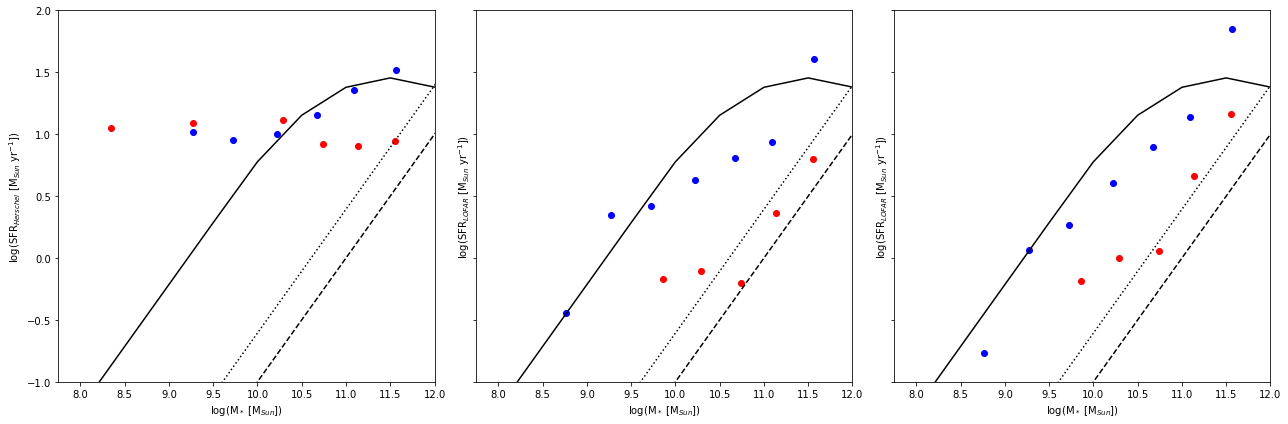

In [106]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6),sharex='row',sharey='row')
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_H']),
            color='r',label='Quiescent galaxies')
axs[0].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_H']),
            color='b',label='Star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_ylim(ymin=-1,ymax=2)
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[1].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[1].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar']),
            color='r',label='Quiescent galaxies')
axs[1].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar']),
            color='b',label='Star-forming galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)

axs[2].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[2].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[2].scatter(results_table.loc[results_table['Type']=='QG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='QG','SFR_lofar_1']),
            color='r',label='Quiescent galaxies')
axs[2].scatter(results_table.loc[results_table['Type']=='SFG','Median_mass'],
            np.log10(results_table.loc[results_table['Type']=='SFG','SFR_lofar_1']),
            color='b',label='Star-forming galaxies')
axs[2].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[2].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[2].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[2].set_xlim(xmax=12)

fig.tight_layout()
plt.show()

In [60]:
w_250

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 1158.0  1171.0  
CD1_1 CD1_2  : -0.00166666670702  0.0  
CD2_1 CD2_2  : 0.0  0.00166666670702  
NAXIS : 2315  2354

In [61]:
pixcrd = np.array([[0,0], [1158,1171], [2315,2354]], dtype=np.float64)
# Convert pixel coordinates to world coordinates
# The second argument is "origin" -- in this case we're declaring we
# have 0-based (Numpy-like) coordinates.
world = w_250.all_pix2world(pixcrd, 1) # or 1-based, in this case
print(world)

[[220.43292128  32.19029642]
 [218.15437317  34.16164398]
 [215.76959362  36.1088936 ]]


In [62]:
pixcrd2 = w_250.all_world2pix(world, 1)
print(pixcrd2)

[[ 0.00000000e+00 -2.27373675e-12]
 [ 1.15800000e+03  1.17100000e+03]
 [ 2.31500000e+03  2.35400000e+03]]


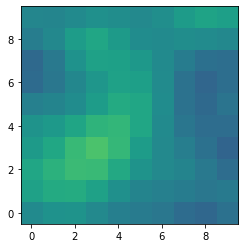

In [99]:
world_coords = [bootes.at[100,'RA'],bootes.at[100,'DEC'],1,148728943]
pixel_coords = w_lofar.all_world2pix([world_coords], 0)
position = (pixel_coords[0][0],pixel_coords[0][1])
size = (10, 10)     # pixels
cutout = Cutout2D(imdata_lofar, position, size)
plt.imshow(cutout.data,clim=(-0.0003,0.0005), origin='lower')

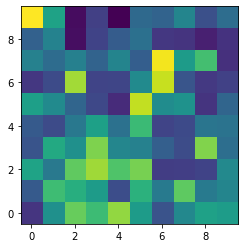

In [94]:
world_coords = [bootes.at[1496570,'RA'],bootes.at[1496570,'DEC']]
pixel_coords = w_250.all_world2pix([world_coords], 0)
position = (pixel_coords[0][0],pixel_coords[0][1])
size = (10, 10)     # pixels
cutout = Cutout2D(imdata_250, position, size)
plt.imshow(cutout.data, origin='lower')#clim=(-0.0003,0.0005)

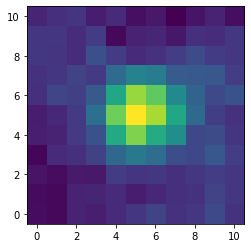

In [93]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('QG',11.0)).loc[:,'RA'],grouped.get_group(('QG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec]
    pixel_coords = w_250.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (11, 11)     # pixels
    cutout = Cutout2D(imdata_250, position, size)
    cutout_list.append(cutout.data)

stacked = np.nanmean(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked, origin='lower')

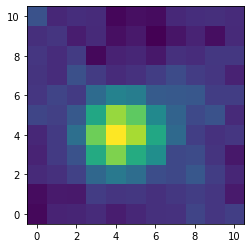

In [116]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('QG',11.0)).loc[:,'RA'],grouped.get_group(('QG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec]
    pixel_coords = w_250.all_world2pix([world_coords], 1)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (11, 11)     # pixels
    cutout = Cutout2D(imdata_250, position, size)
    cutout_list.append(cutout.data)

stacked = np.nanmean(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked, origin='lower')

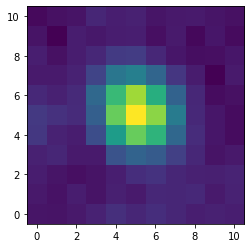

In [97]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('SFG',11.0)).loc[:,'RA'],grouped.get_group(('SFG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec]
    pixel_coords = w_250.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (11, 11)     # pixels
    cutout = Cutout2D(imdata_250, position, size)
    cutout_list.append(cutout.data)

stacked = np.nanmean(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked, origin='lower')

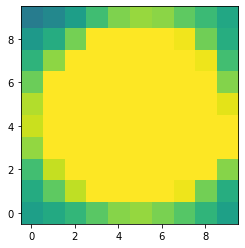

In [26]:
cutout_list=[]
for i in range(10):
    world_coords = [detected['RA'][i],detected['DEC'][i],1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.nanmean(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

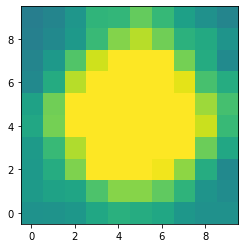

In [24]:
cutout_list=[]
for i in range(30):
    world_coords = [detected['RA'][i],detected['DEC'][i],1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.nanmedian(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

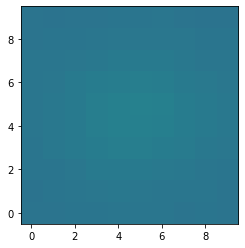

In [23]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('QG',11.0)).loc[:,'RA'],grouped.get_group(('QG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec,1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.median(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

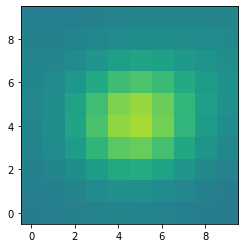

In [24]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('QG',11.0)).loc[:,'RA'],grouped.get_group(('QG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec,1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.average(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

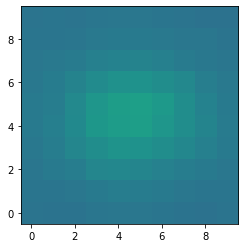

In [25]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('SFG',11.0)).loc[:,'RA'],grouped.get_group(('SFG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec,1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.median(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

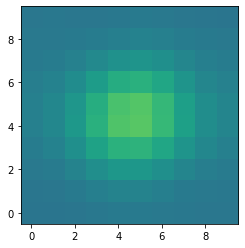

In [26]:
cutout_list=[]
for ra,dec in zip(grouped.get_group(('SFG',11.0)).loc[:,'RA'],grouped.get_group(('SFG',11.0)).loc[:,'DEC']):
    world_coords = [ra,dec,1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (10, 10)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)

stacked = np.average(np.array(cutout_list),axis=0)#,overwrite_input=True)
plt.imshow(stacked,clim=(-0.0003,0.0005), origin='lower')

In [48]:
print("Type - Mass range - Count - Median intensity - Average intensity")
for name in grouped.groups.keys():
    cutout_list=[]
    for ra,dec in zip(grouped.get_group(name).loc[:,'RA'],grouped.get_group(name).loc[:,'DEC']):
        world_coords = [ra,dec,1,148728943]
        pixel_coords = w.all_world2pix([world_coords], 0)
        position = (pixel_coords[0][0],pixel_coords[0][1])
        size = (1, 1)     # pixels
        cutout = Cutout2D(imdata, position, size)
        cutout_list.append(cutout.data)    
    median_stacked = np.median(np.array(cutout_list),axis=0)
    average_stacked = np.average(np.array(cutout_list),axis=0)
    print("{:4s} {:7.0f} -{:3.0f} {:7d}   {:10e}     {:10e}".format(name[0],name[1],name[1]+1,len(grouped.get_group(name)),median_stacked[0][0],average_stacked[0][0]))

Type - Mass range - Count - Median intensity - Average intensity
QG         6 -  7       1   7.702156e-05     7.702156e-05
QG         8 -  9      86   -1.721213e-06     1.201917e-05
QG         9 - 10     688   -4.750245e-07     2.076873e-05
QG        10 - 11    3819   1.326516e-05     4.639698e-05
QG        11 - 12     775   5.070929e-05     3.918988e-04
SFG        4 -  5       1   1.350802e-04     1.350802e-04
SFG        5 -  6      10   1.824726e-05     1.828911e-04
SFG        6 -  7      27   -1.231483e-05     4.230470e-06
SFG        7 -  8     192   3.811816e-07     2.516620e-05
SFG        8 -  9    7428   1.740692e-06     2.519185e-05
SFG        9 - 10   13438   1.625363e-05     4.723980e-05
SFG       10 - 11    6626   6.279964e-05     1.279173e-04
SFG       11 - 12     253   1.537592e-04     3.075001e-04


In [59]:
cutout_list=[]
for i in range(len(detected)):
    world_coords = [detected['RA'][i],detected['DEC'][i],1,148728943]
    pixel_coords = w.all_world2pix([world_coords], 0)
    position = (pixel_coords[0][0],pixel_coords[0][1])
    size = (1, 1)     # pixels
    cutout = Cutout2D(imdata, position, size)
    cutout_list.append(cutout.data)
stacked_median = np.median(np.array(cutout_list),axis=0)
stacked_average = np.average(np.array(cutout_list),axis=0)
print("Median intensity:  {:10e}".format(stacked_median[0][0]))
print("Average intensity: {:10e}".format(stacked_average[0][0]))

Median intensity:  5.025630e-04
Average intensity: 2.334744e-03


## Properties of selected sub-sample

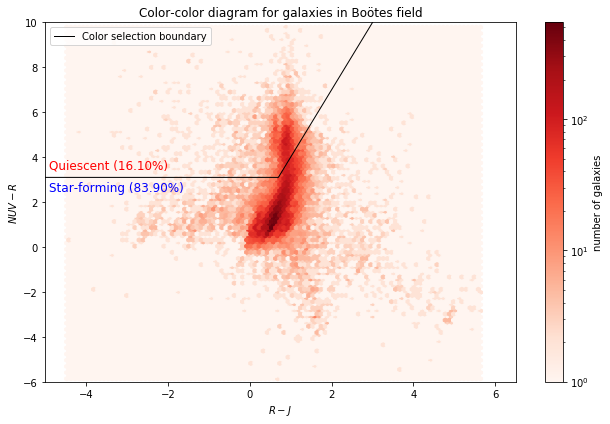

In [23]:
fig, axs = plt.subplots(figsize=(9,6))
axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs.hexbin(bootes.query('0.5<Z_BEST<0.6').loc[:,'RJ'],
                bootes.query('0.5<Z_BEST<0.6').loc[:,'NUVR'],
                bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.legend(numpoints=1, loc='best')
axs.set_xlim(xmin=-5,xmax=6.5)
axs.set_ylim(ymin=-6,ymax=10)
axs.text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
axs.text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig.tight_layout()
plt.show()

Now we can take a look at the redshift and stellar mass distributions of our narrowed down sample.

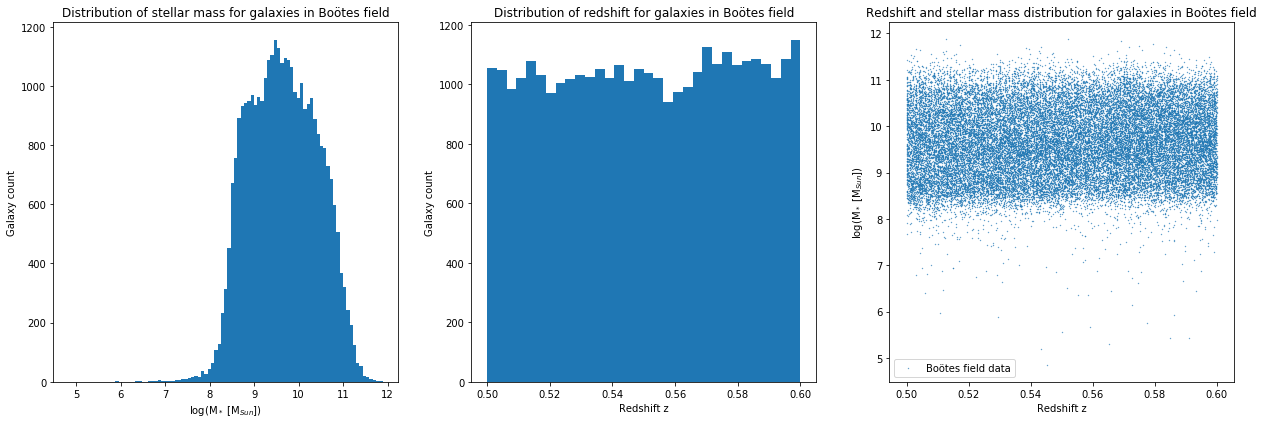

In [24]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{Sun}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['Z_BEST'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax[2].scatter(bootes['Z_BEST'],bootes['Mass_median'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

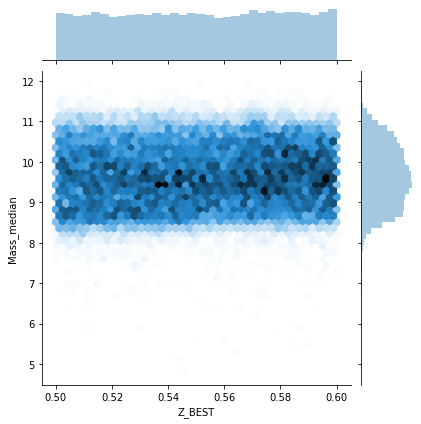

In [25]:
sns.jointplot(x=bootes['Z_BEST'], y=bootes['Mass_median'], kind="hex")#, color="k")

We can also see how the color-color diagram looks like after dividing the sample in three redshift bins.

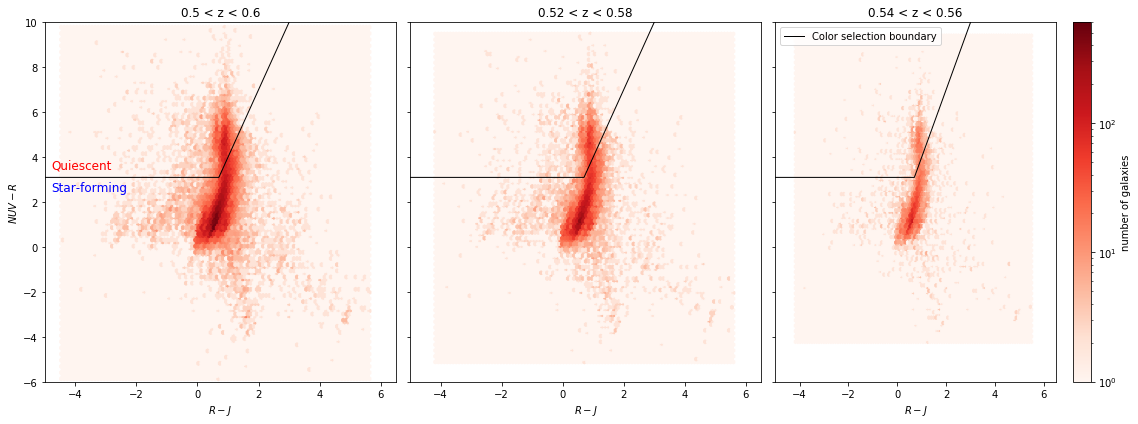

In [26]:
fig, axs = plt.subplots(1,3,sharey='row',figsize=(16,6))
#fig.suptitle('Color-color diagrams for different redshift bins')
fig.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.5,0.52,0.54],[0.6,0.58,0.56]):
    axs[n].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
    xdata = bootes.query(f"{zmin}<=Z_BEST<={zmax}").loc[:,'RJ']
    ydata = bootes.query(f"{zmin}<=Z_BEST<={zmax}").loc[:,'NUVR']
    hb = axs[n].hexbin(xdata,ydata,bins='log',cmap='Reds',vmax=600)
    axs[n].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
    axs[n].set_xlim(xmin=-5,xmax=6.5)
    axs[n].set_ylim(ymin=-6,ymax=10)
    axs[n].set_title(f"{zmin} < z < {zmax}")
cb = fig.colorbar(hb, ax=axs[2])
cb.set_label('number of galaxies')
axs[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
axs[2].legend(numpoints=1, loc='best')
axs[0].text(-4.8,3.5,'Quiescent',size=12,color='r')
axs[0].text(-4.8,2.5,'Star-forming',size=12,color='b')
fig.tight_layout()
plt.show()

## Estimating SFRs from MIPS 24 micron flux

Now we will estimate the star formation rate of individually detected galaxies with the 24 micron flux calibration by Rujopakarn et al. 2013.

We can plot SFR vs stellar mass for the galaxies in our sample. In the following plts I have included the Star Forming Main Sequence as specified by Shreiber 2015, and the quiescent upper sSFR limit from Carnall 2020, both for redshift 0.55.The line indicating log(sSFR) = -11, the upper limit used by Ilbert 2013 for quiescent galaxies, is also shown.

In [68]:
## Schreiber+15 Main sequence
m = np.arange(8,12.5,0.5)-9
z1 = 1.04
r = np.log10(1+z1)
logSFR = m - 0.5 + (1.5*r) - 0.3*(np.fmax(m - 0.36-2.5*r,np.zeros(len(m))))**2
## Carnall+20 sSFR quiescent limit
age = cosmo.age(z1).value
age_factor = np.log10(0.2/age)-9


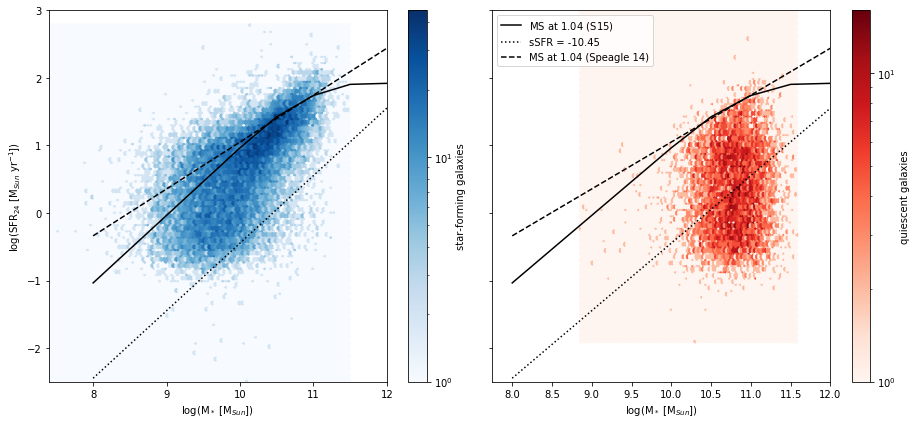

In [69]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.99<z<1.09)&'+SF).loc[:,'Mass_median_2'],
            np.log10(bootes.query('(0.99<z<1.09)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.99<z<1.09)&'+quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes.query('(0.99<z<1.09)&'+quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

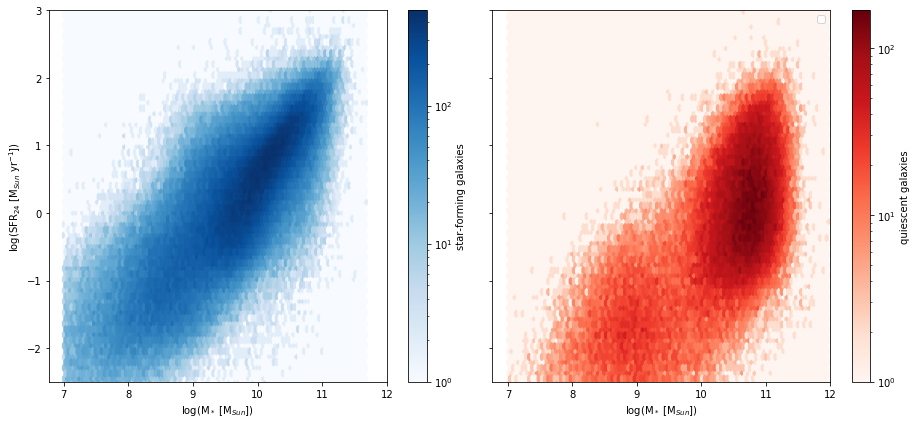

In [78]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query(SF).loc[:,'Mass_median_2'],
            np.log10(bootes.query(SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query(quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes.query(quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

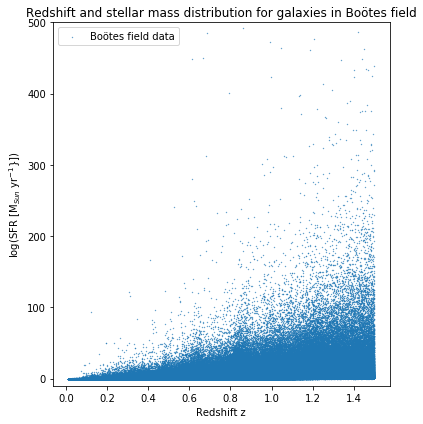

In [76]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
# Plotting stellar mass histogram
# Plotting Stellar mass vs Redshift
ax.set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax.set_xlabel("Redshift z",fontsize=10)
ax.set_ylabel("log(SFR [M$_{Sun}$ yr$^{-1}$}])",fontsize=10)
ax.scatter(bootes['z'],bootes['SFR_24'],s=0.1,label='Boötes field data')
ax.legend(numpoints=1, loc='best')
ax.set_ylim(ymin=-10,ymax=500)
fig.tight_layout()
plt.show()

In [80]:
bootes[bootes['SFR_24']>100]

RA        DEC    Ks_flux  F_MIPS_24  FErr_MIPS_24_u  \
248     216.786062  32.327552  13.471462  189.03467       211.04193   
499     217.262728  32.331164  12.412303  174.03638       200.58380   
6888    217.401287  32.369671  11.058192  161.87875       178.66922   
7470    217.551548  32.373212  17.767191  263.35376       278.99060   
8378    216.681738  32.378442  10.034987  255.38377       272.39087   
...            ...        ...        ...        ...             ...   
828882  219.281673  35.777441  42.257875  772.11370       786.33307   
829809  217.533798  35.782668  63.942446  873.85380       889.72180   
830688  217.941659  35.787162  32.747493  291.19968       304.19376   
831395  217.731891  35.791014  50.941387  521.03094       535.50840   
831616  217.708386  35.792357  12.668688  295.71213       313.65250   

        FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  F_SPIRE_350  ...  \
248          168.67499         NaN         NaN     2.282373     2.535618  ...   
499          137.01266         NaN         NaN     6.666145    12.443625  ...   
6888         144.62518         NaN         NaN     6.195583    17.948433  ...   
7470         247.46645         NaN         NaN     2.912300    23.633036  ...   
8378         237.75363         NaN         NaN     3.166033     2.594383  ...   
...                ...         ...         ...          ...          ...  ...   
828882       758.07690    6.680764   41.847840    24.187850     7.891940  ...   
829809       858.02650   19.281390   19.928663     0.235537     0.287955  ...   
830688       278.00200   24.521389   44.381800    30.723673    33.203880  ...   
831395       507.19254    5.571233   25.506530     5.769590     5.262581  ...   
831616       276.15260   30.655325   43.632828     0.686458     0.646789  ...   

        Z_BEST       z  Mass_median_2   R_rest_2   J_rest_2   NUV_rest  \
248     1.4741  1.4741      10.962000 -23.594545 -24.116667 -20.819471   
499     1.4444  1.4444      10.942149 -23.137537 -24.093912 -20.027113   
6888    1.4694  1.4694      10.911322 -22.797998 -23.743933 -20.004183   
7470    1.2399  1.2399      10.711634 -22.748213 -23.520830 -20.195757   
8378    1.3095  1.3095      10.554069 -22.006205 -22.739443 -20.021810   
...        ...     ...            ...        ...        ...        ...   
828882  0.9691  0.9691      11.020022 -22.408045 -23.721980 -18.002245   
829809  0.9614  0.9614      11.089698 -22.779352 -24.030580 -18.835390   
830688  1.4395  1.4395      10.952271 -23.390654 -24.656404 -20.215532   
831395  1.0454  1.0454      10.518348 -22.727182 -23.998598 -19.675325   
831616  1.2022  1.2022      10.692930 -22.938692 -23.411554 -19.554811   

            NUVR        RJ        LIR_24      SFR_24  
248     2.775074  0.522122  1.271172e+12  126.496543  
499     3.110424  0.956375  1.130676e+12  112.274287  
6888    2.793815  0.945935  1.056813e+12  104.809865  
7470    2.552456  0.772617  1.061612e+12  105.294589  
8378    1.984395  0.733238  1.322090e+12  131.945820  
...          ...       ...           ...         ...  
828882  4.405800  1.313935  1.248830e+12  124.232868  
829809  3.943962  1.251228  1.400999e+12  140.366935  
830688  3.175122  1.265750  2.064148e+12  212.265435  
831395  3.051857  1.271416  1.045775e+12  103.695281  
831616  3.383881  0.472862  1.042172e+12  103.331452  

[2201 rows x 21 columns]

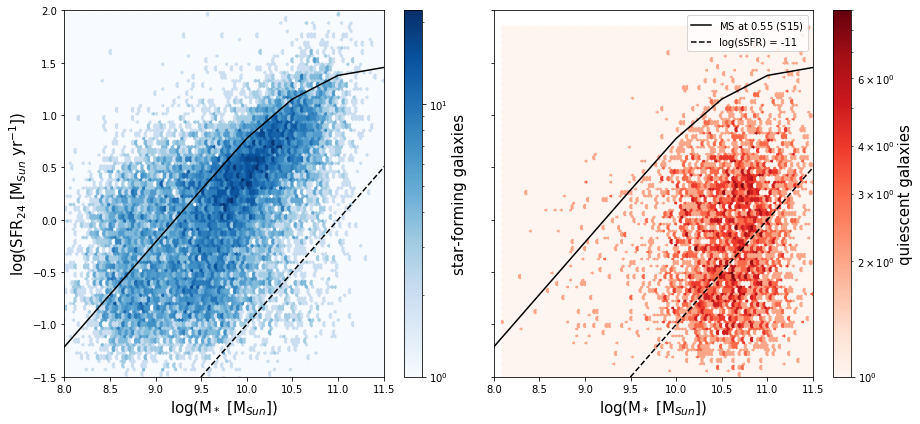

In [29]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
hb = axs[0].hexbin(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies',fontsize=15)
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
hb = axs[1].hexbin(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies',fontsize=15)
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=-1.5,ymax=2)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Here we overlay the individual quiescent galaxies on top of the color map showing th star-forming galaxies. We can observe that the star-forming population roughly follows the trend of the SF Main Sequence, while the quiescent population falls almost exclusively below the MS.

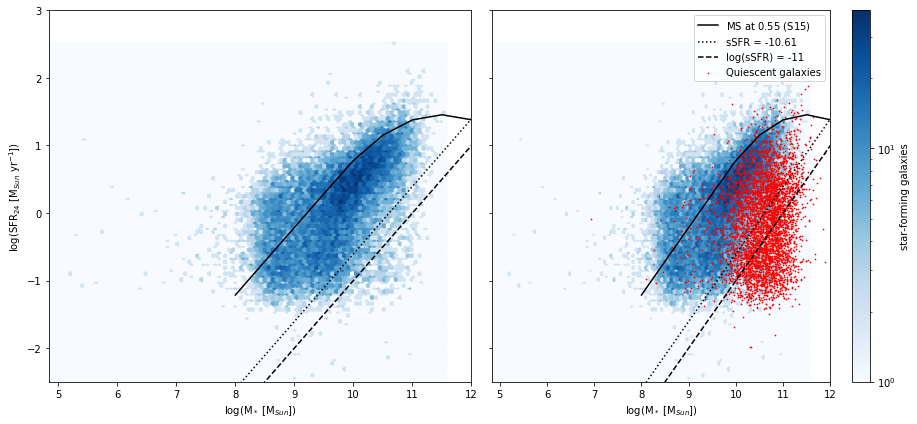

In [30]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

If we include in the plot only the galaxies with SNR higher than 3 in the MIPS data, we se the number number of galaxies is greatly reduced, but especially those in the quiescent population.

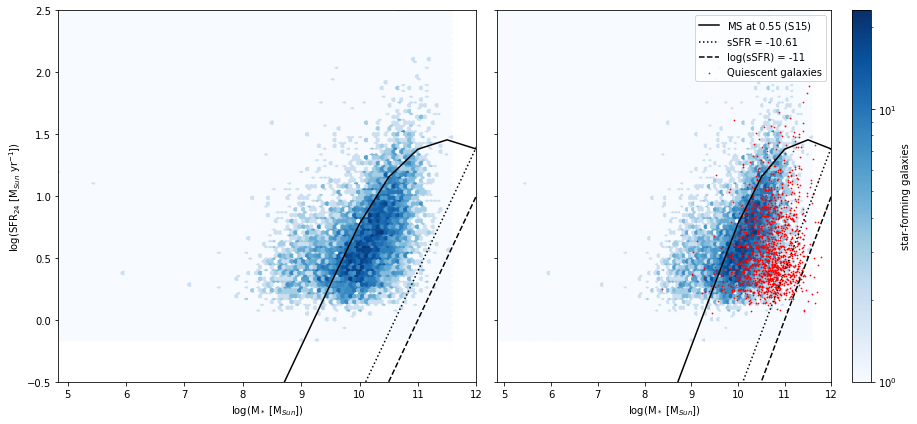

In [33]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF+'&'+MIPSSNR3).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF+'&'+MIPSSNR3).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_favctor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF+'&'+MIPSSNR3).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF+'&'+MIPSSNR3).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent+'&'+MIPSSNR3).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent+'&'+MIPSSNR3).loc[:,'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-0.5,ymax=2.5)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Again, we can compare this distribution showing the galaxies in redshift bins of decreasing width,

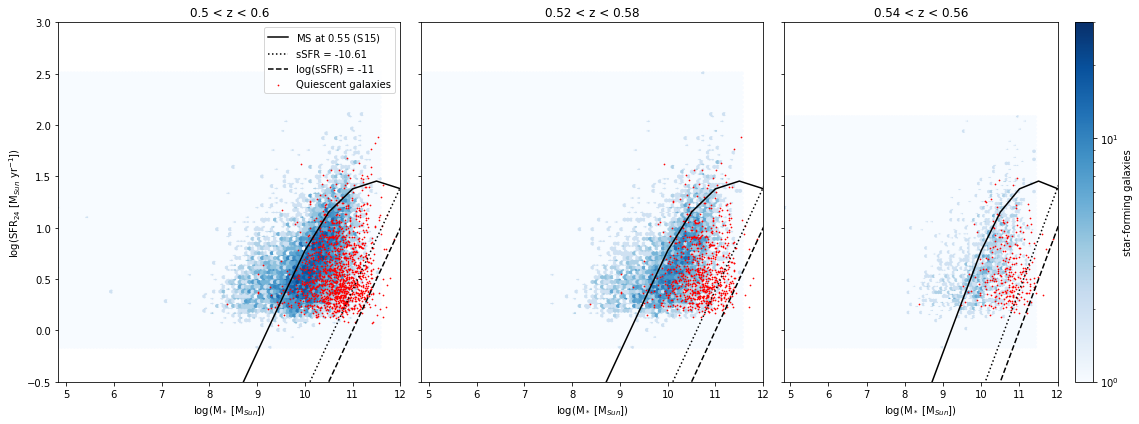

In [34]:
fig, axs = plt.subplots(1,3,sharey='row',figsize=(16,6))
fig.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.5,0.52,0.54],[0.6,0.58,0.56]):
    axs[n].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    
    bootes.query(f"{zmin}<=Z_BEST<={zmax}").loc[:,'RJ']
    
    hb = axs[n].hexbin(bootes.query(f"({zmin}<=Z_BEST<={zmax})&"+SF+'&'+MIPSSNR3).loc[:,'Mass_median'],
                       np.log10(bootes.query(f"({zmin}<=Z_BEST<={zmax})&"+SF+'&'+MIPSSNR3).loc[:,'SFR_24']),
                       cmap='Blues',bins='log',vmax=30)
    axs[n].scatter(bootes.query(f"({zmin}<=Z_BEST<={zmax})&"+quiescent+'&'+MIPSSNR3).loc[:,'Mass_median'],
                   np.log10(bootes.query(f"({zmin}<=Z_BEST<={zmax})&"+quiescent+'&'+MIPSSNR3).loc[:,'SFR_24']),
                   s=0.5,color='r',label='Quiescent galaxies')
    axs[n].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
    axs[n].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
    axs[n].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    axs[n].set_xlim(xmax=12)
    axs[n].set_ylim(ymin=-0.5,ymax=3)
    axs[n].set_title(f"{zmin} < z < {zmax}")

cb = fig.colorbar(hb, ax=axs[2])
cb.set_label('star-forming galaxies')
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Following the inverse procedure, we can show in the color-color diagram the distribution of galaxies that are classified as quiescent or star-forming according to the limit defined by Carnall 2020, which implies an maximum sSFR of -10.61 at redshift ~0.55. We can see that the great majority of low sSFR galaxies are indeed foun within the quiescent region of the color-color diagram, but also many Main Sequence galaxies are being misclassified as quiescent.

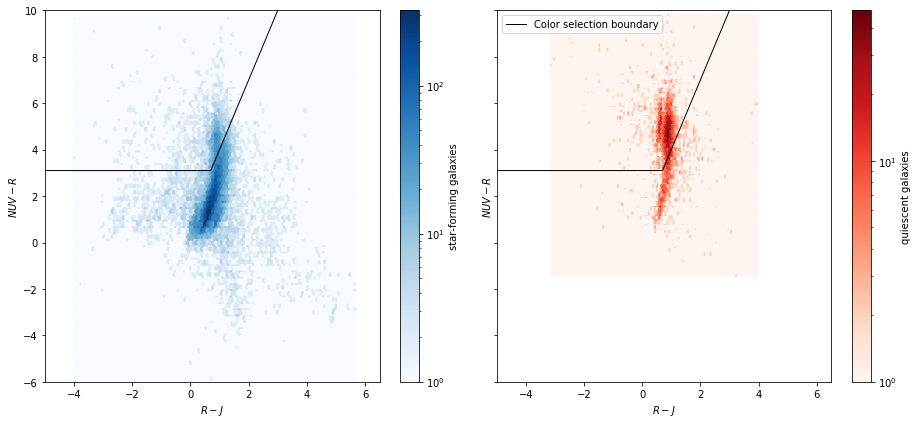

In [46]:
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'NUVR'],
                bins='log',cmap='Blues')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[0].set_xlim(xmin=-5,xmax=6.5)
axs[0].set_ylim(ymin=-6,ymax=10)

axs[1].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[1].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'NUVR'],
                bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[1].set_xlim(xmin=-5,xmax=6.5)

axs[1].legend(numpoints=1, loc='best')
#axs[1].text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
#axs[1].text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig.tight_layout()
plt.show()

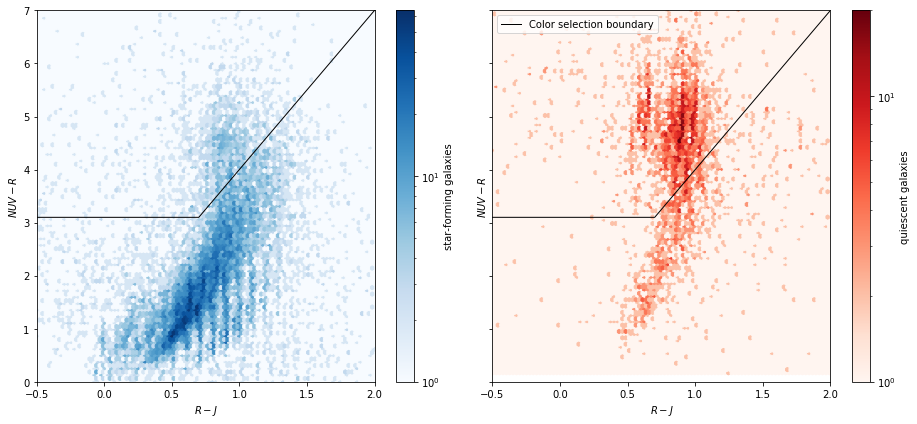

In [74]:
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'NUVR'],
                bins='log',cmap='Blues')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[0].set_xlim(xmin=-0.5,xmax=2)
axs[0].set_ylim(ymin=0,ymax=7)

axs[1].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[1].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)&(-0.5<RJ<2)&(0<NUVR<7)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'NUVR'],
                bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
#axs[1].set_xlim(xmin=-5,xmax=6.5)

axs[1].legend(numpoints=1, loc='best')
#axs[1].text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
#axs[1].text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig.tight_layout()
plt.show()

## Estimating LIRs and SFRs from Herschel data
We can now check the number of entries wich have available data in the 2 PACS and 3 SPIRE bands from the Herschel space telescope.

In [30]:
q_PACS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_PACS_100']),:])
print(f"Fraction of quiescent galaxies with PACS data: {q_PACS/n_quiescent:.2%}")
sf_PACS = len(bootes.query(SF).loc[np.isfinite(bootes['F_PACS_100']),:])
print(f"Fraction of star forming galaxies with PACS data: {sf_PACS/n_star_forming:.2%}")
print("")
q_SPIRE = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_SPIRE_500']),:])
print(f"Fraction of quiescent galaxies with SPIRE data: {q_SPIRE/n_quiescent:.2%}")
sf_SPIRE = len(bootes.query(SF).loc[np.isfinite(bootes['F_SPIRE_500']),:])
print(f"Fraction of star forming galaxies with SPIRE data: {sf_SPIRE/n_star_forming:.2%}")

Fraction of quiescent galaxies with PACS data: 41.20%
Fraction of star forming galaxies with PACS data: 39.52%

Fraction of quiescent galaxies with SPIRE data: 42.62%
Fraction of star forming galaxies with SPIRE data: 41.14%


We will now estimate the total infrared luminosities by redshifting and rescaling a modified greybody model to the available Herschel PACS + SPIRE data. The greybody + power law model is taken from Casey (2012).

In [31]:
from scipy.optimize import curve_fit
from scipy.integrate import quad
import astropy.units as u

In [32]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [33]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return np.log10(LIR_LSun)

In [34]:
V_Herschel = np.vectorize(HerschelLIR)

In [35]:
bootes['LIR_H'] = V_Herschel(bootes['Z_BEST'],bootes['F_PACS_100'],bootes['F_PACS_160'],bootes['F_SPIRE_250'],bootes['F_SPIRE_350'],bootes['F_SPIRE_500'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Now we can use LIR for each galaxy to calculate the SFR according to the Schmidt-Kennicutt law, adjusted to the Chabrier (2003) initial mass function.

In [36]:
bootes['SFR_H'] = np.power(10,bootes['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

Once again we can look at the distribution of the estimated SFR vs stellar mass for our star-forming and quiescent populations.

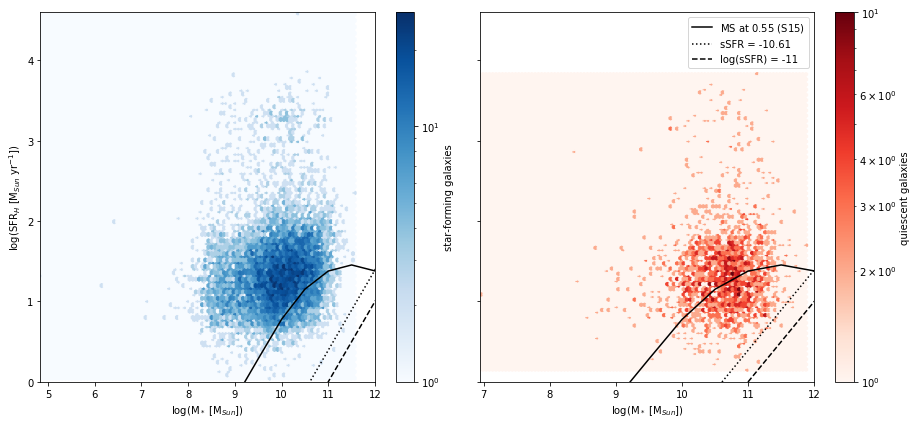

In [37]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

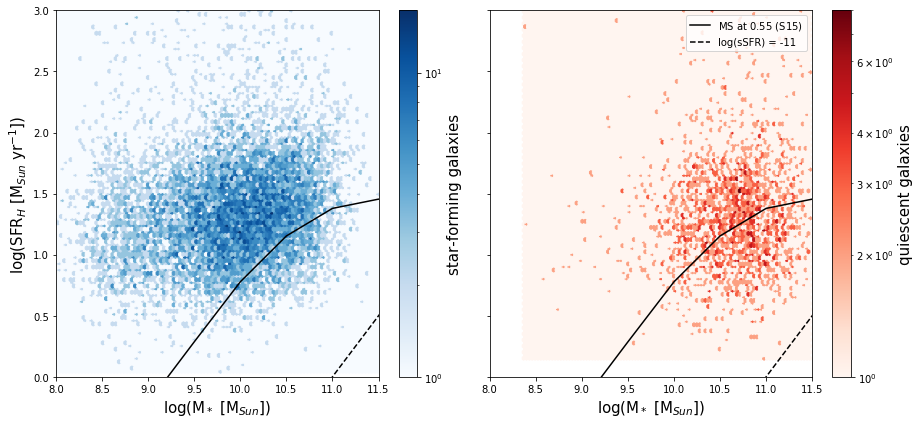

In [52]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies',fontsize=15)
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=11.5)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies',fontsize=15)
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=0,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

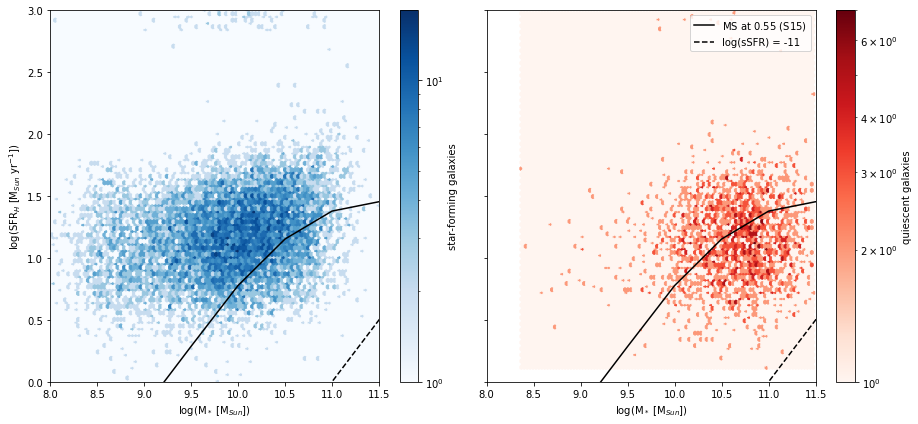

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=11.5)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=0,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

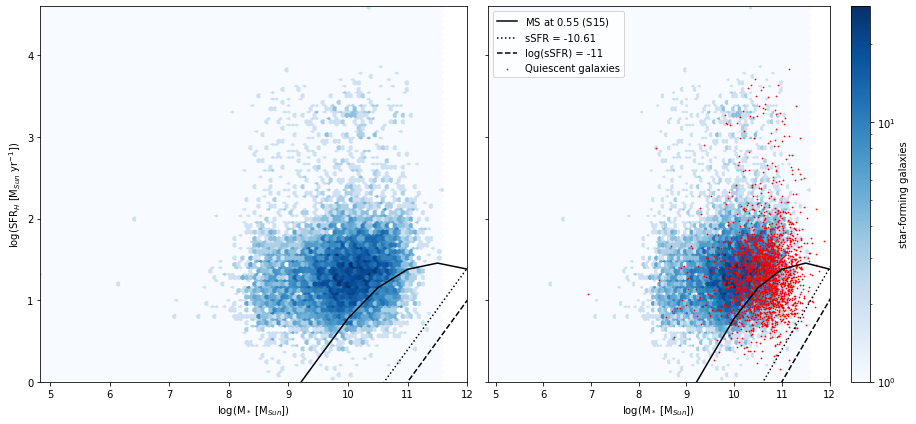

In [56]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

We can even compare our two estimates for SFRs, and see that thosw calculated from Herschel data are systematically higher than those from Spitzer MIPS data. 

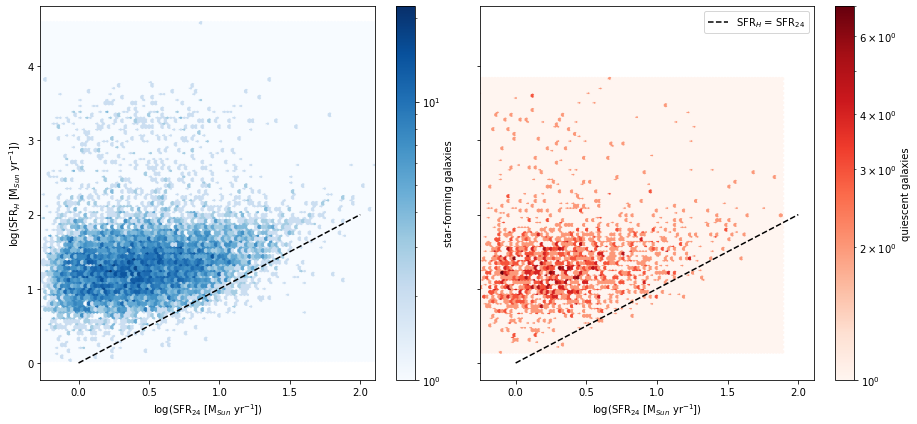

In [57]:
#%% Plotting Star formation rate calculated from Herschel and Spitzer data
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')

axs[1].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[1].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Here we show the distribution of galaxies by SFR_24/SFR_H ratio vs Stellar mass

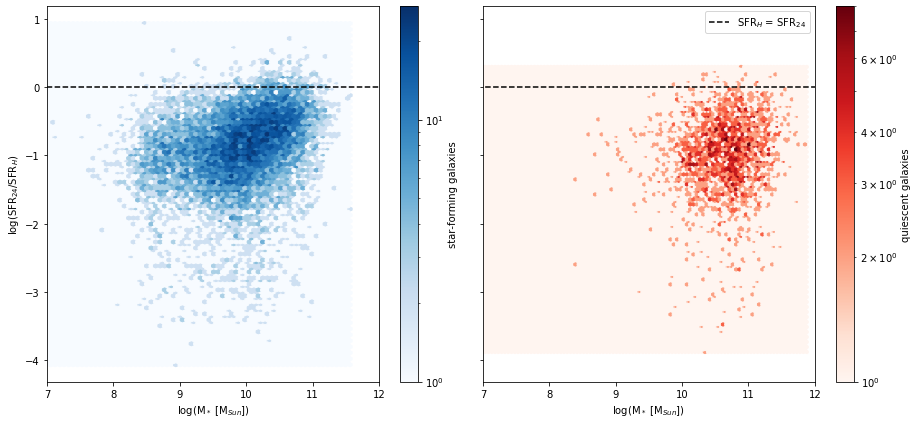

In [58]:
#%% Plotting SFR_24/SFR_H ratio vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$/SFR$_{H}$)",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Casey 2012 actually recommends using the IR emission in the interval of 40-1000 micron for calculations of SFR, as opposed to the traditional 8-1000 micron range. We can repeat the previous process modifying only the lower limit of integration.

In [46]:
def HerschelLIR40(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),40,1000) # c/lambda^2 factor gives flux per unit of wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return np.log10(LIR_LSun)

In [47]:
V_Herschel40 = np.vectorize(HerschelLIR40)

In [48]:
bootes['LIR_H_40'] = V_Herschel40(bootes['Z_BEST'],bootes['F_PACS_100'],bootes['F_PACS_160'],bootes['F_SPIRE_250'],bootes['F_SPIRE_350'],bootes['F_SPIRE_500'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [49]:
bootes['SFR_H_40'] = np.power(10,bootes['LIR_H_40'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

Here we show the distribution of galaxies in SFR vs Stellar mass for both our calculations of SFR.

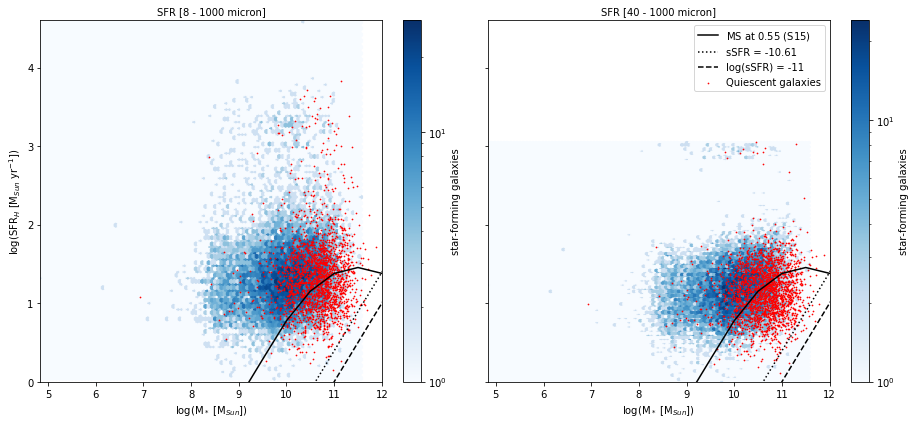

In [50]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_title("SFR [8 - 1000 micron]",fontsize=10)
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_title("SFR [40 - 1000 micron]",fontsize=10)
axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

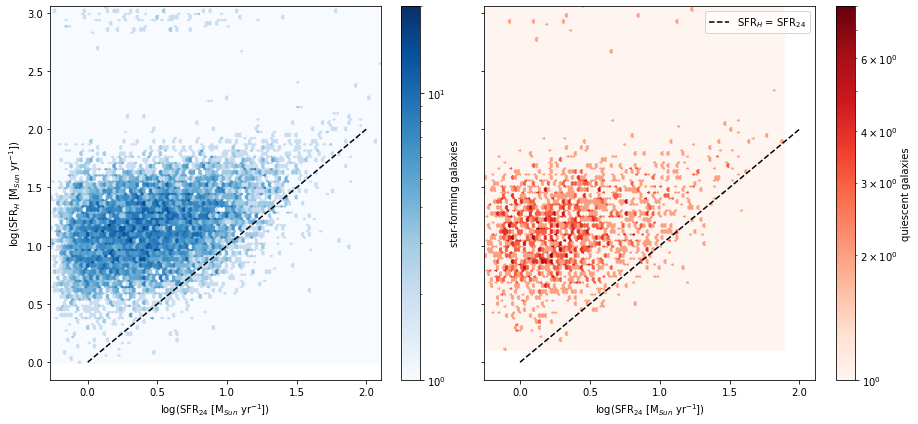

In [66]:
#%% Plotting Star formation rate calculated from Herschel and Spitzer data
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')

axs[1].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[1].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

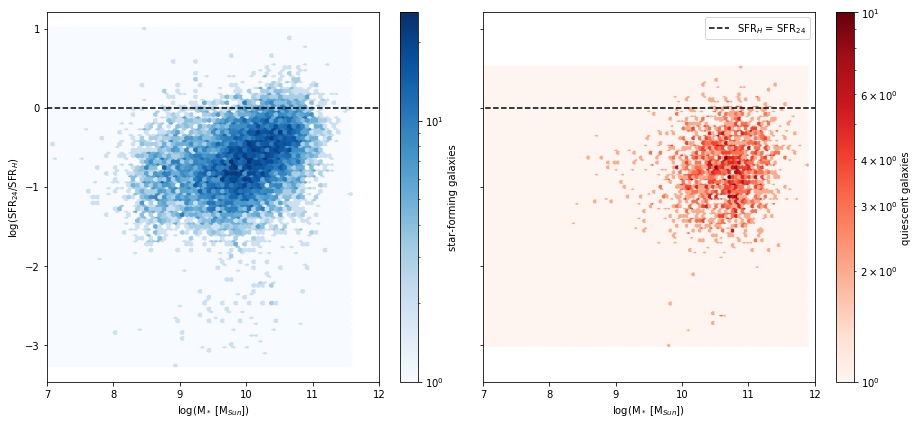

In [67]:
#%% Plotting SFR_24/SFR_H ratio vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$/SFR$_{H}$)",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


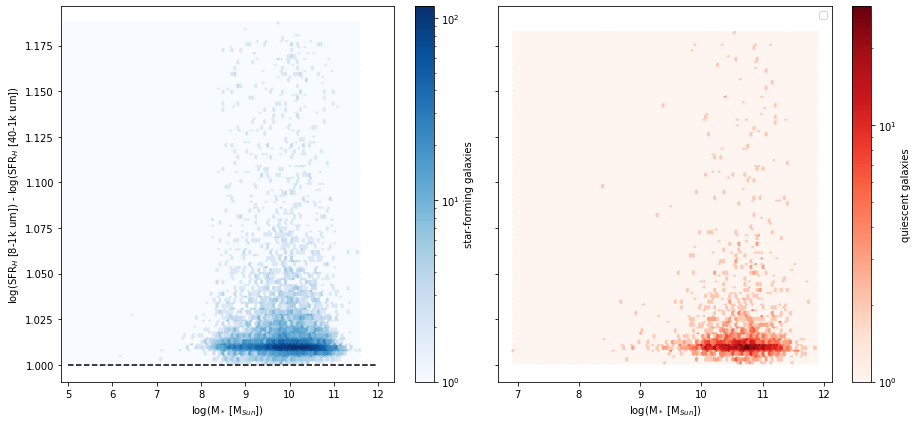

In [109]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [8-1k um]) - log(SFR$_{H}$ [40-1k um])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


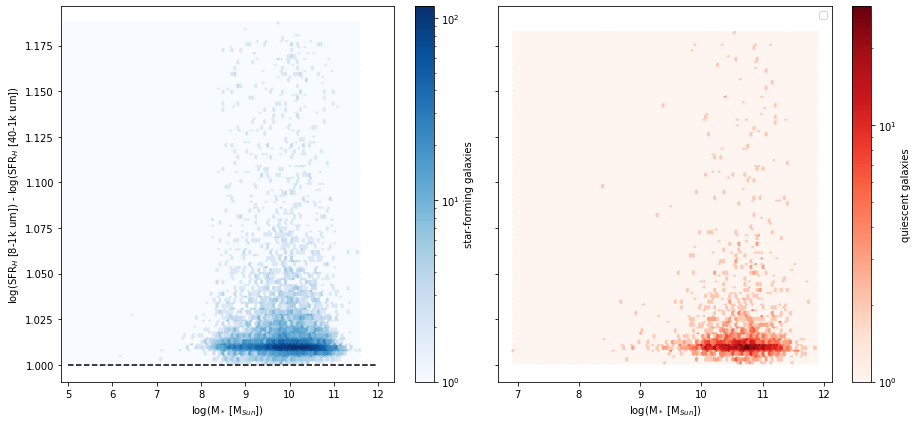

In [68]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [8-1k um]) - log(SFR$_{H}$ [40-1k um])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


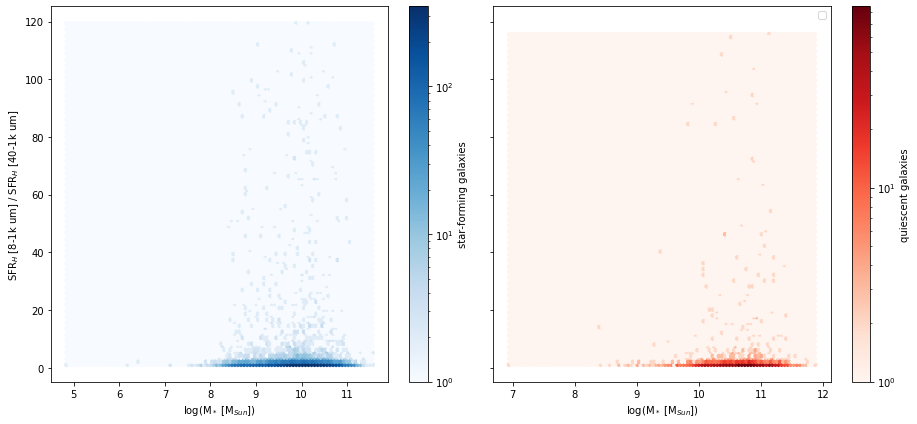

In [108]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("SFR$_{H}$ [8-1k um] / SFR$_{H}$ [40-1k um]",fontsize=10)
#hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'Mass_median'],
#            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'SFR_H_40'],
#            cmap='Blues',bins='log')
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ [8-1k um] = SFR$_{H}$ [40-1k um]')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ [8-1k um] = SFR$_{H}$ [40-1k um]' )
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=1,ymax=5)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

In [64]:
bootes.query('F_PACS_100>0')

RA        DEC    u_flux     Ks_flux   F_MIPS_24  \
45644    216.665040  32.460879  1.098642    8.590043   66.903244   
47125    216.394837  32.465252  0.077598   31.294355   67.464360   
47143    216.651973  32.465296  1.086764   36.811830  201.892720   
47990    216.450691  32.467813  0.265779    3.665034   51.935660   
49844    216.396077  32.473205  1.565705   13.784001   42.368004   
...             ...        ...       ...         ...         ...   
1494711  216.985367  35.675249  1.606410   10.495328   48.104473   
1494846  219.032425  35.675481  0.555871   49.875383   67.705284   
1494988  217.274819  35.675772  0.176187   55.321369  173.961470   
1495120  218.986744  35.676030  3.200013    4.122233   36.543552   
1495823  217.912245  35.677445  0.736605  130.850943  388.763200   

         FErr_MIPS_24_u  FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  \
45644         80.049900       52.360960  503.126220  493.384670     2.848694   
47125         84.428764       51.438934  600.806100  512.582640     1.165862   
47143        216.738820      187.076050  506.618700  490.689940     4.392479   
47990         75.657166       30.783833  516.819100  485.190220     0.628004   
49844         58.924854       25.264175   26.522411    9.528784     0.740417   
...                 ...             ...         ...         ...          ...   
1494711       64.754940       32.463108   11.471306    6.223834     1.437251   
1494846       82.354416       53.101303   36.188370   33.118100     2.146950   
1494988      192.358350      155.733340   11.971466   10.616992     2.984261   
1495120       57.954723       16.479734   46.875770    7.568207     2.936690   
1495823      401.511960      375.868680   41.144672   15.792737    24.500631   

         ...     J_rest   NUV_rest      NUVR        RJ        LIR_24  \
45644    ... -20.063593 -18.700000  0.816886  0.546707  2.704219e+10   
47125    ... -21.808165 -15.940150  5.058326  0.809689  3.061605e+10   
47143    ... -21.874075 -18.601651  2.420808  0.851616  7.997188e+10   
47990    ... -18.882711 -17.330923  1.109974  0.441814  2.437845e+10   
49844    ... -20.489510 -19.032443  0.903985  0.553082  1.578831e+10   
...      ...        ...        ...       ...       ...           ...   
1494711  ... -20.832785 -19.320497  0.947553  0.564735  2.321385e+10   
1494846  ... -22.285410 -17.888524  4.011834  0.385052  2.545583e+10   
1494988  ... -22.525251 -16.863767  4.554593  1.106891  8.652220e+10   
1495120  ... -20.477991 -19.642242  0.433703  0.402046  1.134687e+10   
1495823  ... -23.254240 -18.201044  4.102932  0.950264  1.640035e+11   

            SFR_24      LIR_H        SFR_H   LIR_H_40     SFR_H_40  
45644     2.507642  13.275952  1914.588067  12.928643   860.530804  
47125     2.845516  13.494362  3165.815019  13.048420  1133.817048  
47143     7.564713  13.244327  1780.122895  12.898359   802.567882  
47990     2.256339  13.403550  2568.464343  13.005171  1026.346075  
49844     1.449691        NaN          NaN        NaN          NaN  
...            ...        ...          ...        ...          ...  
1494711   2.146622  11.907393    81.943839  11.346235    22.509083  
1494846   2.357924  12.075992   120.813371  11.749808    57.007413  
1494988   8.196141  11.609582    41.276711  11.344105    22.398957  
1495120   1.035587        NaN          NaN        NaN          NaN  
1495823  15.719024  12.064680   117.707094  11.755266    57.728326  

[13269 rows x 25 columns]

In [84]:
bootes.query(SF).loc[:,['RA','DEC','Mass_median']].to_csv('/home/bruno/Documents/COSMOamautas/Data/star_forming.csv',index=False)

In [52]:
results_table = pd.DataFrame({})
for name in grouped.groups.keys():
    
    #grouped.get_group(name).median()['Mass_median']
                                                                    # FWHM = fwhm[arcsec]/(3600*pix_scale[degree])
    lofar_median, lofar_average = get_flux(group=name,image_data=imdata_lofar,w=w_lofar,FWHM=6/(3600*0.000417),lofar=True)
    
    median_250, average_250 = get_flux(group=name,image_data=imdata_250,w=w_250,FWHM=18.2/(3600*0.0017))
    median_350, average_350 = get_flux(group=name,image_data=imdata_350,w=w_350,FWHM=24.9/(3600*0.0023))
    median_500, average_500 = get_flux(group=name,image_data=imdata_500,w=w_500,FWHM=36.3/(3600*0.0033))
    median_100, average_100 = get_flux(group=name,image_data=imdata_100,w=w_100,FWHM=6.8/(3600*0.00056))
    median_160, average_160 = get_flux(group=name,image_data=imdata_160,w=w_160,FWHM=11/(3600*0.00083))
        
    results_table = results_table.append(pd.DataFrame({"Type":[name[0]],
                                                        "Mass_range":[f'{name[1]} - {name[1]+1}'],
                                                        "Median_mass":[grouped.get_group(name).median()['Mass_median']],
                                                        "Count":[len(grouped.get_group(name))],
                                                        "LOFAR_Median":[lofar_median],
                                                        "LOFAR_Average":[lofar_average],
                                                        "250_Median":[median_250],
                                                        "250_Average":[average_250],
                                                        "350_Median":[median_350],
                                                        "350_Average":[average_350],
                                                        "500_Median":[median_500],
                                                        "500_Average":[average_500],
                                                        "100_Median":[median_100],
                                                        "100_Average":[average_100],
                                                        "160_Median":[median_160],
                                                        "160_Average":[average_160]}),ignore_index=True)

NameError: name 'NoOverlapError' is not defined

In [48]:
end_time=time()
print("Running notebook took {:.4g} seconds!".format(end_time-start_time))

# NOTEBOOK ENDS HERE